### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Scenario


The NHS has enlisted our team of data analysts to investigate healthcare service usage, missed appointments, and whether external data (such as social media) can provide useful insights. The NHS aims to optimize its budget allocation to meet the demands of a growing population. Our goal is to analyze data, identify trends, and provide recommendations to enhance efficiency and inform decision-making. The key questions they would like to have answered are:
- Should the NHS start looking at increasing staff levels?
- How do the healthcare professional types differ over time?
- Are there significant changes in whether or not visits are attended?
- Are there changes in terms of appointment type and the busiest months?
- Are there any trends in time between booking and appointment?
- How do the various service settings compare?


# 

### Preparing the workstation

In [10]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import calendar

In [11]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv("actual_duration.csv")
ad.info()
ad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [12]:
# Determine whether there are duplicate values in ad.
duplicates = ad.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Determine whether there are missing values in ad.
print(f"Null values:")
print(ad.isnull().sum())

Duplicates: 0
Null values:
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


In [13]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv("appointments_regional.csv")
ar.info()
ar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [14]:
# Determine whether there are duplicate values ar.
duplicates = ar.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Determine whether there are missing values in ar.
print(f"Null values:")
print(ar.isnull().sum())

Duplicates: 21604
Null values:
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


In [15]:
# Display duplicate head to have a look at the values
duplicates = ar[ar.duplicated(keep=False)]
duplicates.head(10)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
13236,E54000044,2020-01,Attended,GP,Home Visit,Unknown / Data Quality,1
13252,E54000044,2020-01,Attended,GP,Unknown,Unknown / Data Quality,2
13307,E54000044,2020-01,DNA,GP,Home Visit,8 to 14 Days,1
13332,E54000044,2020-01,DNA,Other Practice staff,Home Visit,2 to 7 Days,1
13349,E54000044,2020-01,DNA,Other Practice staff,Unknown,More than 28 Days,32
13352,E54000044,2020-01,DNA,Unknown,Face-to-Face,2 to 7 Days,1
13353,E54000044,2020-01,DNA,Unknown,Face-to-Face,Same Day,6
13354,E54000044,2020-01,DNA,Unknown,Home Visit,1 Day,2
13355,E54000044,2020-01,DNA,Unknown,Home Visit,Same Day,5
13370,E54000044,2020-01,Unknown,GP,Home Visit,22 to 28 Days,1


In [16]:
# Calculate the appointment count for duplicate values to compare with total count in ar.
duplicate_appointment_total = duplicates["count_of_appointments"].sum()
appointment_total = ar["count_of_appointments"].sum()

duplicate_percentage = (duplicate_appointment_total / appointment_total) * 100
duplicate_percentage = round(duplicate_percentage, 2)

duplicate_percentage

0.07

In [17]:
# Drop duplicates fuond in ar.
duplicates = ar[ar.duplicated()]
ar = ar.drop_duplicates(keep="first")

In [18]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel("national_categories.xlsx")
nc.info()
nc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [19]:
# Determine whether there are duplicate values in nc.
duplicates = nc.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Determine whether there are missing values in nc.
print(f"Null values per column:")
print(nc.isnull().sum())

Duplicates: 0
Null values per column:
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


### Exploring the data set

**Question 1:** How many locations are there in the data set?

In [22]:
# Determine the number of locations.
unique_locations = ad["sub_icb_location_code"].nunique()
unique_locations

106

**Question 2:** What are the five locations with the highest number of appointments?



In [24]:
# Determine the top five locations based on most appointments in total.
appointment_sum = ad.groupby("sub_icb_location_name")["count_of_appointments"]
appointment_sum = appointment_sum.sum().sort_values(ascending=False)

appointment_sum.head(5)

sub_icb_location_name
NHS North West London ICB - W2U3Z              6976986
NHS North East London ICB - A3A8R              5341883
NHS Kent and Medway ICB - 91Q                  5209641
NHS Hampshire and Isle Of Wight ICB - D9Y0V    4712737
NHS South East London ICB - 72Q                4360079
Name: count_of_appointments, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [26]:
# Determine the number of service settings.

print("Number of service settings:", nc["service_setting"].nunique())

service_setting_totals = nc.groupby("service_setting")["count_of_appointments"]
service_setting_totals = service_setting_totals.sum().reset_index()
service_setting_totals = service_setting_totals.sort_values(
    "count_of_appointments", ascending=False)

total_appointments = service_setting_totals["count_of_appointments"].sum()
service_setting_totals["percentage"] = (
    service_setting_totals["count_of_appointments"] / total_appointments) * 100
service_setting_totals["percentage"] = service_setting_totals["percentage"].round(1)

service_setting_totals

Number of service settings: 5


,service_setting,count_of_appointments,percentage
1,General Practice,270811691,91.5
4,Unmapped,11080810,3.7
3,Primary Care Network,6557386,2.2
2,Other,5420076,1.8
0,Extended Access Provision,2176807,0.7


In [27]:
# Determine the number of context types.

print("Number of context types:", nc["context_type"].nunique())

context_type_totals = nc.groupby("context_type")["count_of_appointments"].sum()
context_type_totals = context_type_totals.reset_index()
context_type_totals = context_type_totals.sort_values(
    "count_of_appointments", ascending=False)

total_appointments = context_type_totals["count_of_appointments"].sum()
context_type_totals["percentage"] = (
    context_type_totals["count_of_appointments"] / total_appointments) * 100
context_type_totals["percentage"] = context_type_totals["percentage"].round(1)

context_type_totals

Number of context types: 3


,context_type,count_of_appointments,percentage
0,Care Related Encounter,257075158,86.8
1,Inconsistent Mapping,27890802,9.4
2,Unmapped,11080810,3.7


In [28]:
# Determine the number of national categories.

print("Number of national categories:", nc["national_category"].nunique())

national_category_totals = nc.groupby("national_category")[
    "count_of_appointments"].sum().reset_index()
national_category_totals = national_category_totals.sort_values(
    "count_of_appointments", ascending=False)

total_appointments = context_type_totals["count_of_appointments"].sum()
national_category_totals["percentage"] = (
    national_category_totals["count_of_appointments"] / total_appointments) * 100
national_category_totals["percentage"] = national_category_totals[
    "percentage"].round(1)

national_category_totals

Number of national categories: 18


,national_category,count_of_appointments,percentage
4,General Consultation Routine,97271522,32.9
3,General Consultation Acute,53691150,18.1
2,Clinical Triage,41546964,14.0
11,Planned Clinics,28019748,9.5
7,Inconsistent Mapping,27890802,9.4
10,Planned Clinical Procedure,25702694,8.7
15,Unmapped,11080810,3.7
16,Unplanned Clinical Activity,3055794,1.0
6,Home Visit,2144452,0.7
14,Structured Medication Review,1858379,0.6


In [29]:
# Determine the number of appointment statuses.

print(f"Number of appointment statuses:", ar["appointment_status"].nunique())

appointment_status_totals = ar.groupby("appointment_status")[
    "count_of_appointments"].sum().reset_index()
appointment_status_totals = appointment_status_totals.sort_values(
    "count_of_appointments", ascending=False)

total_appointments = appointment_status_totals["count_of_appointments"].sum()
appointment_status_totals["percentage"] = (
    appointment_status_totals["count_of_appointments"] / total_appointments) * 100
appointment_status_totals["percentage"] = appointment_status_totals[
    "percentage"].round(1)

appointment_status_totals

Number of appointment statuses: 3


,appointment_status,count_of_appointments,percentage
0,Attended,677646088,91.3
2,Unknown,34050656,4.6
1,DNA,30833015,4.2


### Continuing to explore the data and searching for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [33]:
# View the first five rows of appointment_date for the ad DataFrame.
ad["appointment_date"].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [34]:
# change the date format and data type.
ad["appointment_date"] = pd.to_datetime(
    ad["appointment_date"], format="%d-%b-%y")
ad["appointment_date"].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [35]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc["appointment_date"].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [36]:
# add column for month & year to ad.
ad["appointment_month"] = ad["appointment_date"].dt.month
ad["appointment_year"] = ad["appointment_date"].dt.year

ad[["appointment_date", "appointment_month", 
    "appointment_year"]].head()

,appointment_date,appointment_month,appointment_year
0,2021-12-01,12,2021
1,2021-12-01,12,2021
2,2021-12-01,12,2021
3,2021-12-01,12,2021
4,2021-12-01,12,2021


In [37]:
# split month into month and year in nc.
nc["appointment_month"] = nc["appointment_date"].dt.month
nc["appointment_year"] = nc["appointment_date"].dt.year

nc[["appointment_date", "appointment_month",
    "appointment_year"]].head()

,appointment_date,appointment_month,appointment_year
0,2021-08-02,8,2021
1,2021-08-02,8,2021
2,2021-08-02,8,2021
3,2021-08-02,8,2021
4,2021-08-02,8,2021


In [38]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min_date = nc["appointment_date"].min()
nc_max_date = nc["appointment_date"].max()

print("Earliest appointment:", nc_min_date.strftime("%Y-%m-%d"))
print("Latest appointment:", nc_max_date.strftime("%Y-%m-%d"))

Earliest appointment: 2021-08-01
Latest appointment: 2022-06-30


In [39]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_min_date = ad["appointment_date"].min()
ad_max_date = ad["appointment_date"].max()

print("Earliest appointment:", ad_min_date.strftime("%Y-%m-%d"))
print("Latest appointment:", ad_max_date.strftime("%Y-%m-%d"))

Earliest appointment: 2021-12-01
Latest appointment: 2022-06-30


In [40]:
# Determine the minimum and maximum dates in the ar DataFrame.
ar["appointment_month"] = pd.to_datetime(ar["appointment_month"], format="%Y-%m")
ar_min_month = ar["appointment_month"].min()
ar_max_month = ar["appointment_month"].max()

print("Earliest appointment:", ar_min_month.strftime("%Y-%m-%d"))
print("Latest appointment:", ar_max_month.strftime("%Y-%m-%d"))

Earliest appointment: 2020-01-01
Latest appointment: 2022-06-01


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [42]:
# Per service setting the number of records available for period and location.

nc_jan_jun = nc.loc[(nc["appointment_date"] >= "2022-01-01") &  
                     (nc["appointment_date"] <= "2022-06-01")]  

nc_jan_jun = nc_jan_jun[nc_jan_jun["sub_icb_location_name"]  
                        .str.contains("NHS North West London", na=False)]  

nw_london_totals = nc_jan_jun.groupby(["service_setting",  
                                              "sub_icb_location_name"])  
nw_london_totals = nw_london_totals["count_of_appointments"]  
nw_london_totals = nw_london_totals.sum().reset_index()  

nw_london_totals = nw_london_totals.pivot(  
    index="service_setting", columns="sub_icb_location_name",  
    values="count_of_appointments")  

nw_london_totals.loc["Total"] = nw_london_totals.sum()  

nw_london_totals = nw_london_totals.rename(  
    columns={"NHS North West London ICB - W2U3Z": "NHS North West London"})  

nw_london_totals = nw_london_totals.sort_values(  
    by="NHS North West London", ascending=False)  

nw_london_totals  

sub_icb_location_name,NHS North West London
service_setting,
Total,5556241
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


**Question 3:** Which month had the highest number of appointments?

In [44]:
monthly_appointments = nc.groupby([
    "appointment_year", "appointment_month"])["count_of_appointments"].sum()
max_month = monthly_appointments.idxmax()
max_appointments = monthly_appointments.max()

year, month = max_month
month = calendar.month_name[int(month)]

print(f"The period with the highest number of appointments is {month} {year} "
      f"with {max_appointments} appointments.")

The period with the highest number of appointments is November 2021 with 30405070 appointments.


**Question 4:** What was the total number of records per month?

In [46]:
nc_monthly_totals = (nc.groupby([
    "appointment_year", "appointment_month"])["count_of_appointments"]
                  .sum().reset_index())

nc_monthly_totals["appointment_month"] = nc_monthly_totals[
"appointment_month"].apply(lambda x: calendar.month_name[x])

nc_monthly_totals

,appointment_year,appointment_month,count_of_appointments
0,2021,August,23852171
1,2021,September,28522501
2,2021,October,30303834
3,2021,November,30405070
4,2021,December,25140776
5,2022,January,25635474
6,2022,February,25355260
7,2022,March,29595038
8,2022,April,23913060
9,2022,May,27495508


In [47]:
ar["appointment_month"] = pd.to_datetime(ar["appointment_month"])
ar["appointment_year"] = ar["appointment_month"].dt.year
ar["appointment_month"] = ar["appointment_month"].dt.month

ar_monthly_totals = (ar.groupby(["appointment_year", "appointment_month"])[
        "count_of_appointments"].sum().reset_index())

ar_monthly_totals["appointment_month"] = ar_monthly_totals[
    "appointment_month"].apply(lambda x: calendar.month_name[x])

ar_monthly_totals

,appointment_year,appointment_month,count_of_appointments
0,2020,January,27191758
1,2020,February,24097066
2,2020,March,24039635
3,2020,April,16002488
4,2020,May,16410591
5,2020,June,20678416
6,2020,July,22483207
7,2020,August,20143878
8,2020,September,26706462
9,2020,October,28296051


In [48]:
ad["appointment_month"] = ad["appointment_date"].dt.month
ad["appointment_year"] = ad["appointment_date"].dt.year

ad_monthly_totals = ad.groupby(["appointment_year", "appointment_month"])[
    "count_of_appointments"].sum().reset_index()
ad_monthly_totals["appointment_month"] = ad_monthly_totals[
"appointment_month"].apply(lambda x: calendar.month_name[x])

ad_monthly_totals

,appointment_year,appointment_month,count_of_appointments
0,2021,December,22853483
1,2022,January,23597196
2,2022,February,23351939
3,2022,March,27170002
4,2022,April,21948814
5,2022,May,25343941
6,2022,June,23715317


In [49]:
# Compare the 3 data sources with total amount of appointments per month to check consistency.

ad_pivot = ad_monthly_totals.set_index(
    ["appointment_year", "appointment_month"])[
"count_of_appointments"].rename("ad_appointments")

ar_pivot = ar_monthly_totals.set_index(
    ["appointment_year", "appointment_month"])[
"count_of_appointments"].rename("ar_appointments")

nc_pivot = nc_monthly_totals.set_index(
    ["appointment_year", "appointment_month"])[
"count_of_appointments"].rename("nc_appointments")

pivoted_totals = pd.concat(
    [ad_pivot, ar_pivot, nc_pivot], axis=1).reset_index()

pivoted_totals["appointment_month"] = pivoted_totals[
    "appointment_month"].apply(lambda x: list(calendar.month_name).index(x))

pivoted_totals = pivoted_totals.sort_values(
    by=["appointment_year", "appointment_month"]).reset_index(drop=True)

pivoted_totals["appointment_month"] = pivoted_totals[
    "appointment_month"].apply(lambda x: calendar.month_name[x])

pivoted_totals

,appointment_year,appointment_month,ad_appointments,ar_appointments,nc_appointments
0,2020,January,NaN,27191758,NaN
1,2020,February,NaN,24097066,NaN
2,2020,March,NaN,24039635,NaN
3,2020,April,NaN,16002488,NaN
4,2020,May,NaN,16410591,NaN
5,2020,June,NaN,20678416,NaN
6,2020,July,NaN,22483207,NaN
7,2020,August,NaN,20143878,NaN
8,2020,September,NaN,26706462,NaN
9,2020,October,NaN,28296051,NaN


### Creating visualisations and identifying possible monthly and seasonal trends in the data.

In [52]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(12, 8)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

**Service settings:**

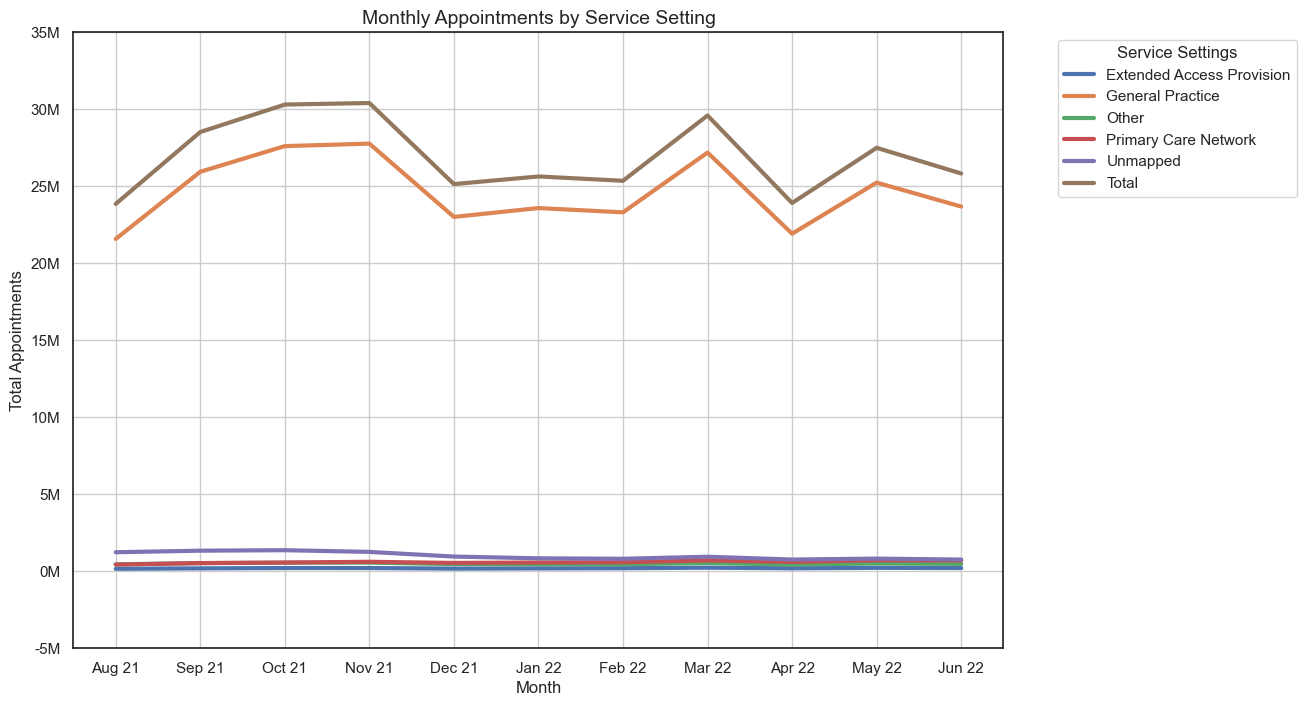

In [55]:
nc["appointment_year_month"] = nc["appointment_date"].dt.strftime("%Y-%m")
service_setting_totals = nc.groupby(
    ["appointment_year_month", "service_setting"])[
    "count_of_appointments"].sum().reset_index()

appointment_totals = nc.groupby("appointment_year_month")[
    "count_of_appointments"].sum().reset_index()
appointment_totals["service_setting"] = "Total" 

totals = pd.concat([service_setting_totals, appointment_totals])

totals["month_year"] = totals["appointment_year_month"].astype(str)
totals["month_year"] = pd.to_datetime(totals["month_year"]).dt.strftime("%b %y")

plt.figure
sns.lineplot(data=totals, x="month_year", y="count_of_appointments", 
             hue="service_setting", linewidth=3, errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Monthly Appointments by Service Setting", fontsize=14)
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

**Context types:**

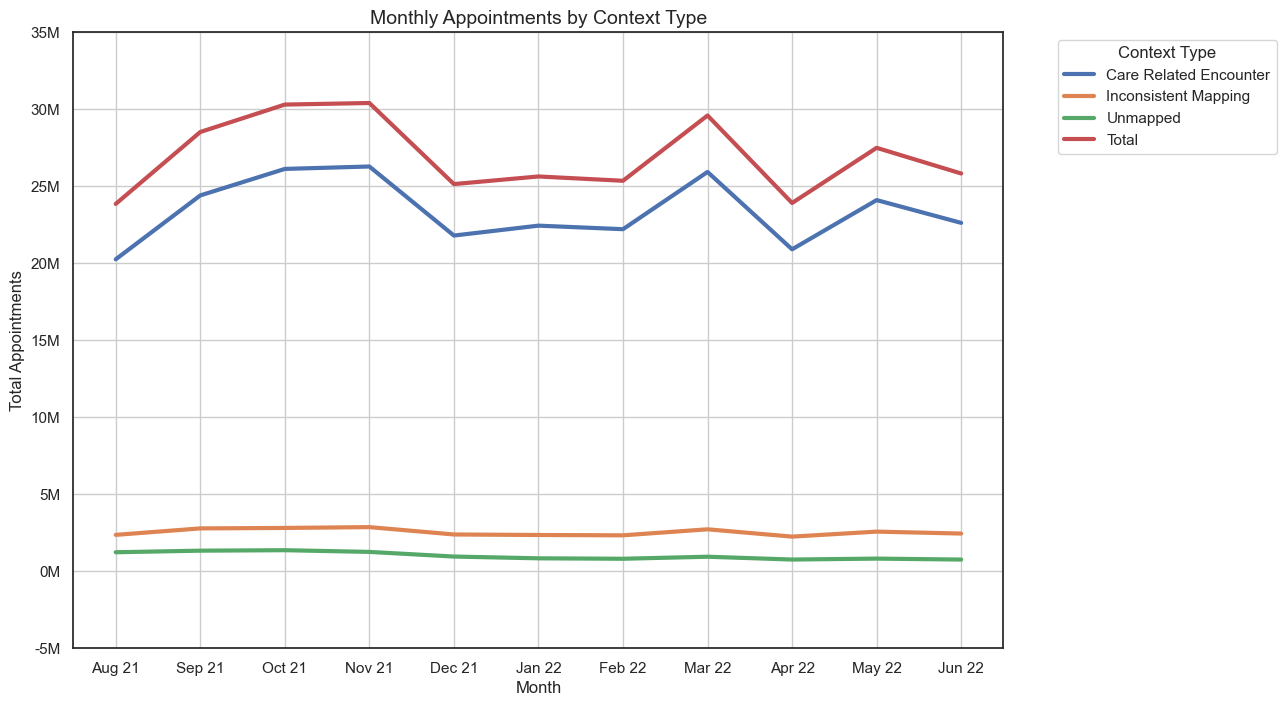

In [57]:
context_type_totals = nc.groupby([
    "appointment_year_month", "context_type"])[
"count_of_appointments"].sum().reset_index()

appointment_totals = nc.groupby("appointment_year_month")[
    "count_of_appointments"].sum().reset_index()
appointment_totals["context_type"] = "Total" 

totals = pd.concat([context_type_totals, appointment_totals])

totals["month_year"] = totals["appointment_year_month"].astype(str)
totals["month_year"] = pd.to_datetime(
    totals["month_year"]).dt.strftime("%b %y")

plt.figure()
sns.lineplot(data=totals, x="month_year", y="count_of_appointments", 
             hue="context_type", linewidth=3, errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Monthly Appointments by Context Type", fontsize=14)
plt.legend(title="Context Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

**National categories:**

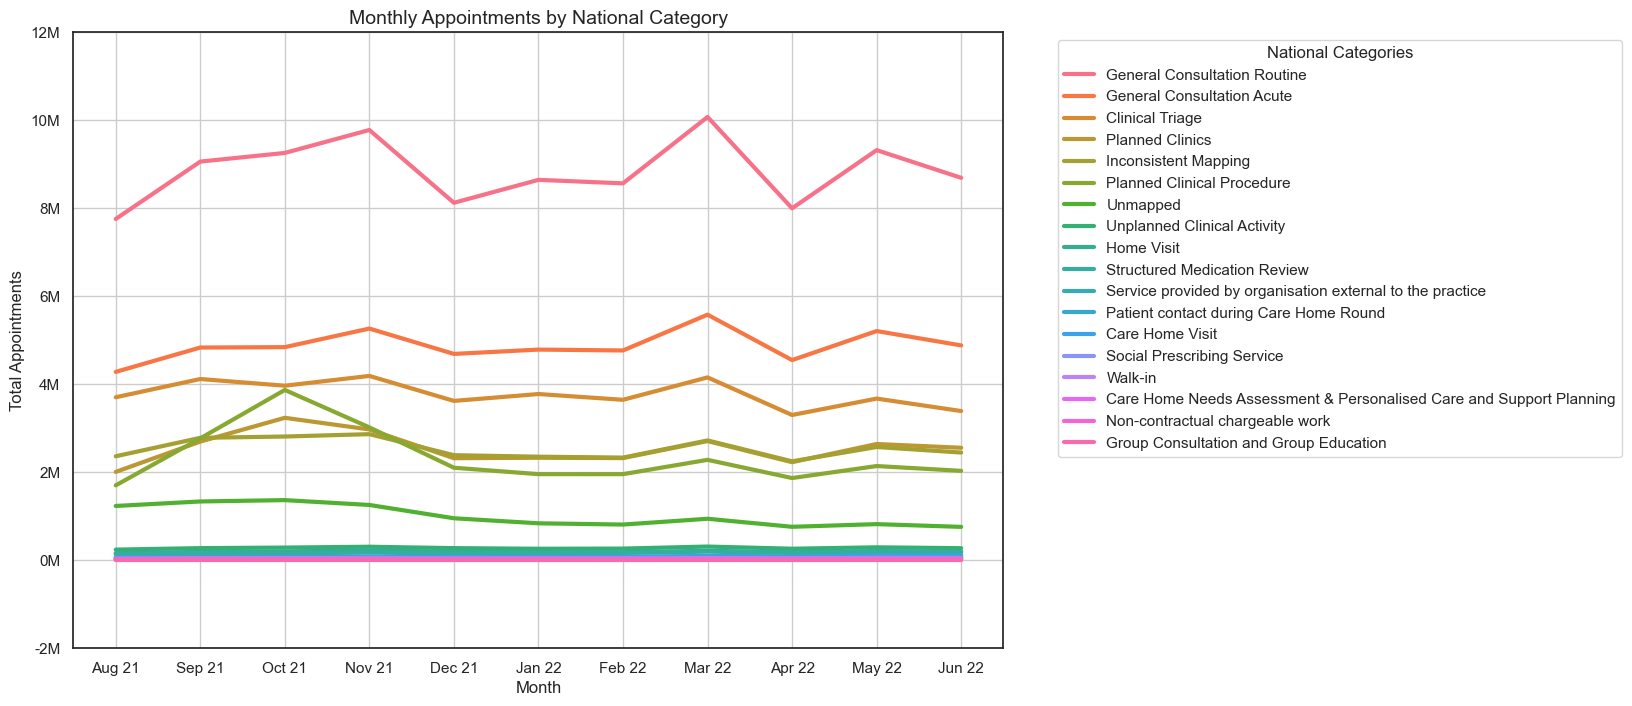

In [59]:
nc["appointment_year_month"] = nc[
"appointment_date"].dt.strftime("%Y-%m")

totals = nc.groupby(["appointment_year_month", "national_category"])[
    "count_of_appointments"].sum().reset_index()

totals["month_year"] = pd.to_datetime(totals["appointment_year_month"]
                                      .astype(str)).dt.strftime("%b %y")

sorted_categories = (totals.groupby("national_category")[
                     "count_of_appointments"].sum().sort_values(ascending=False).index.tolist())

plt.figure
sns.lineplot(data=totals,  x="month_year", y="count_of_appointments", 
             hue="national_category", linewidth=3, 
             hue_order=sorted_categories, errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Monthly Appointments by National Category", fontsize=14)
plt.legend(title="National Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (August 2021):**

In [62]:
# Create a separate data set that can be used in future weeks. 
nc["month_name"] = nc["appointment_month"].apply(
    lambda x: calendar.month_abbr[x])

summer_21 = nc[nc["appointment_month"] == 8]
autumn_21 = nc[nc["appointment_month"].between(9, 11)]
winter_21_22 = nc[(nc["appointment_month"] == 12)
    | (nc["appointment_month"].between(1, 2))]
spring_22 = nc[nc["appointment_month"].between(3, 5)]
summer_22 = nc[nc["appointment_month"] == 6]

def get_season_totals(df, season_name, sort_key):
    totals = df.groupby("service_setting")[
    "count_of_appointments"].sum().reset_index()
    totals["season"] = season_name
    totals["sort_order"] = sort_key
    return totals

summer_21_totals = get_season_totals(summer_21, "Summer 21", 1)
autumn_21_totals = get_season_totals(autumn_21, "Autumn 21", 2)
winter_21_22_totals = get_season_totals(winter_21_22, "Winter 21-22", 3)
spring_22_totals = get_season_totals(spring_22, "Spring 22", 4)
summer_22_totals = get_season_totals(summer_22, "Summer 22", 5)

seasons_totals = pd.concat([summer_21_totals, autumn_21_totals, 
                            winter_21_22_totals, spring_22_totals, summer_22_totals])

pivot_table = seasons_totals.pivot(index="service_setting", columns="season", 
                                   values="count_of_appointments")
pivot_table = pivot_table[["Summer 21", "Autumn 21", "Winter 21-22", 
                           "Spring 22", "Summer 22"]]

pivot_table

season,Summer 21,Autumn 21,Winter 21-22,Spring 22,Summer 22
service_setting,,,,,
Extended Access Provision,160927,605022,556506,644700,209652
General Practice,21575852,81314881,69897805,74342779,23680374
Other,449101,1642445,1378311,1471406,478813
Primary Care Network,432448,1709790,1693823,2020726,700599
Unmapped,1233843,3959267,2605065,2523995,758640


In [63]:
# Create a function for separate tables for each season displaying the data per month.

def create_season_pivot(df):
    totals = df.groupby(["service_setting", "month_name"])[
    "count_of_appointments"].sum().reset_index()
    pivot = totals.pivot(index="service_setting", columns="month_name", 
                         values="count_of_appointments")
    
    pivot = pivot[sorted(pivot.columns, key=lambda x: list(calendar.month_abbr)
                         .index(x))]
    
    return pivot

In [64]:
summer_21_pivot = create_season_pivot(summer_21)
summer_21_pivot

month_name,Aug
service_setting,
Extended Access Provision,160927
General Practice,21575852
Other,449101
Primary Care Network,432448
Unmapped,1233843


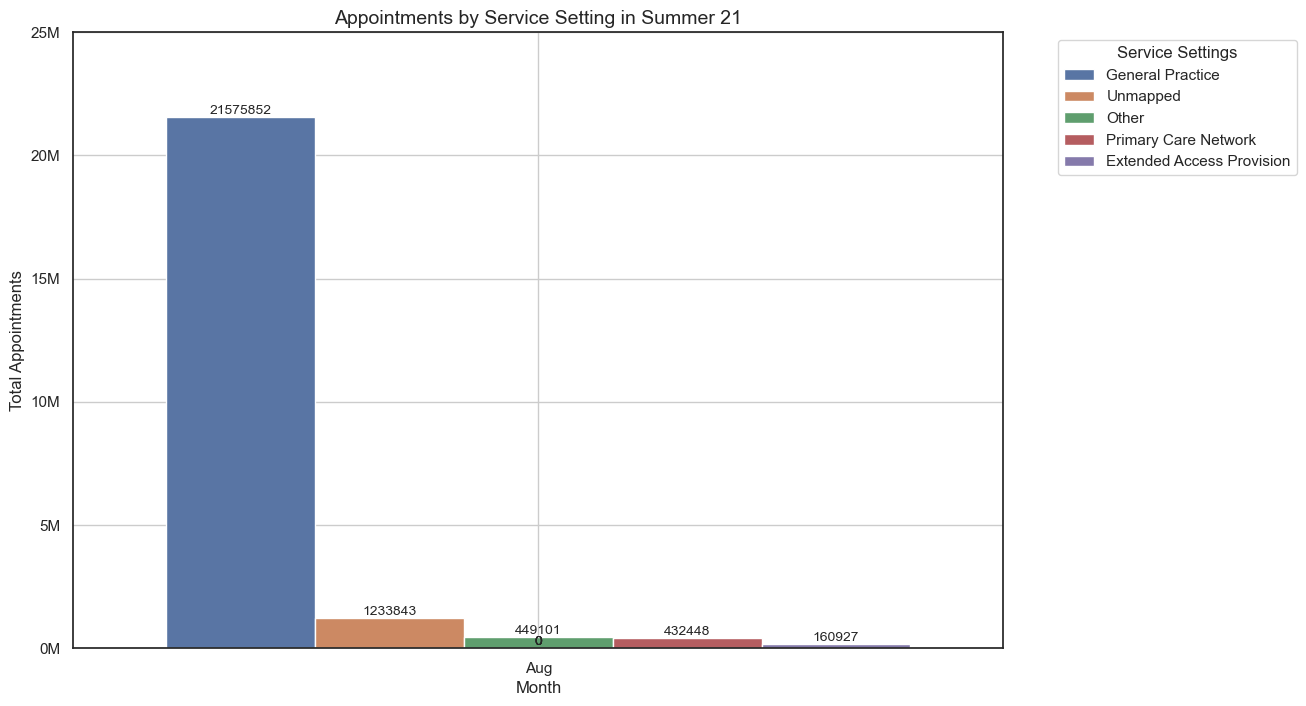

In [65]:
summer_21_melted = summer_21_pivot.reset_index().melt(
    id_vars="service_setting", var_name="Month", value_name="Appointments")
summer_21_melted = summer_21_melted.sort_values(
    "Appointments", ascending=False)

plt.figure
graph = sns.barplot(data=summer_21_melted, x="Month", y="Appointments", 
                    hue="service_setting", errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Appointments by Service Setting in Summer 21", fontsize=14)
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

for bar in graph.patches:
    height = int(bar.get_height())
    graph.text(bar.get_x() + bar.get_width() / 2, height, f"{height}",
               ha="center", va="bottom", fontsize=10)

y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

**Autumn (September to November 2021):**

In [67]:
autumn_21_pivot = create_season_pivot(autumn_21)
autumn_21_pivot

month_name,Sep,Oct,Nov
service_setting,,,
Extended Access Provision,187906,209539,207577
General Practice,25940821,27606171,27767889
Other,527174,556487,558784
Primary Care Network,530485,564981,614324
Unmapped,1336115,1366656,1256496


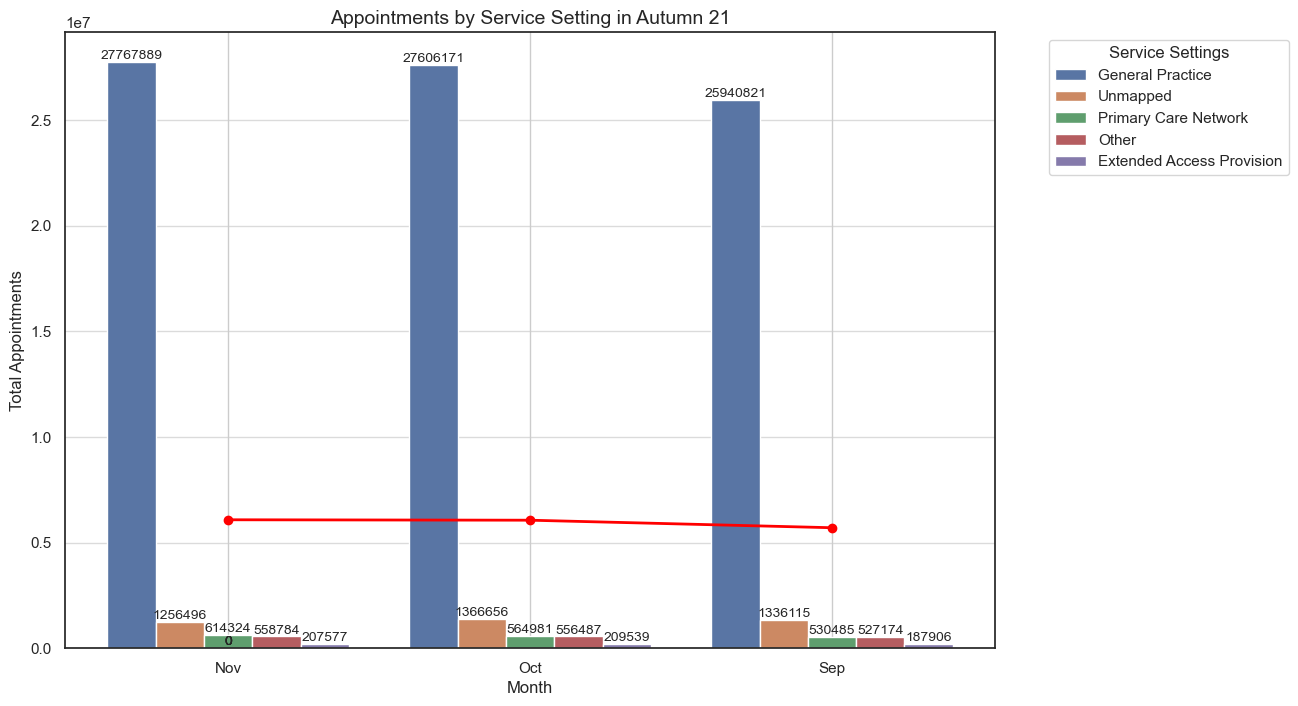

In [68]:
autumn_21_melted = autumn_21_pivot.reset_index().melt(
    id_vars="service_setting", var_name="Month", value_name="Appointments")

autumn_21_melted = autumn_21_melted.sort_values(
    "Appointments", ascending=False)

plt.figure
graph = sns.barplot(data=autumn_21_melted, x="Month", y="Appointments", 
                    hue="service_setting", errorbar=None)

for bar in graph.patches:
    height = int(bar.get_height())
    graph.text(bar.get_x() + bar.get_width() / 2, height, f"{height}",
               ha="center", va="bottom", fontsize=10)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Appointments by Service Setting in Autumn 21", fontsize=14)
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", alpha=0.7)

y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.grid(True)

monthly_avg = autumn_21_melted.groupby("Month")["Appointments"].mean()
plt.plot(monthly_avg.index, monthly_avg.values, color="red", linewidth=2, 
         label="Monthly Avg", marker="o")

plt.show()

**Winter (December to February 2022):**

In [70]:
winter_21_22_pivot = create_season_pivot(winter_21_22)
winter_21_22_pivot

month_name,Jan,Feb,Dec
service_setting,,,
Extended Access Provision,186375,196627,173504
General Practice,23583053,23305934,23008818
Other,457440,456153,464718
Primary Care Network,569044,585300,539479
Unmapped,839562,811246,954257


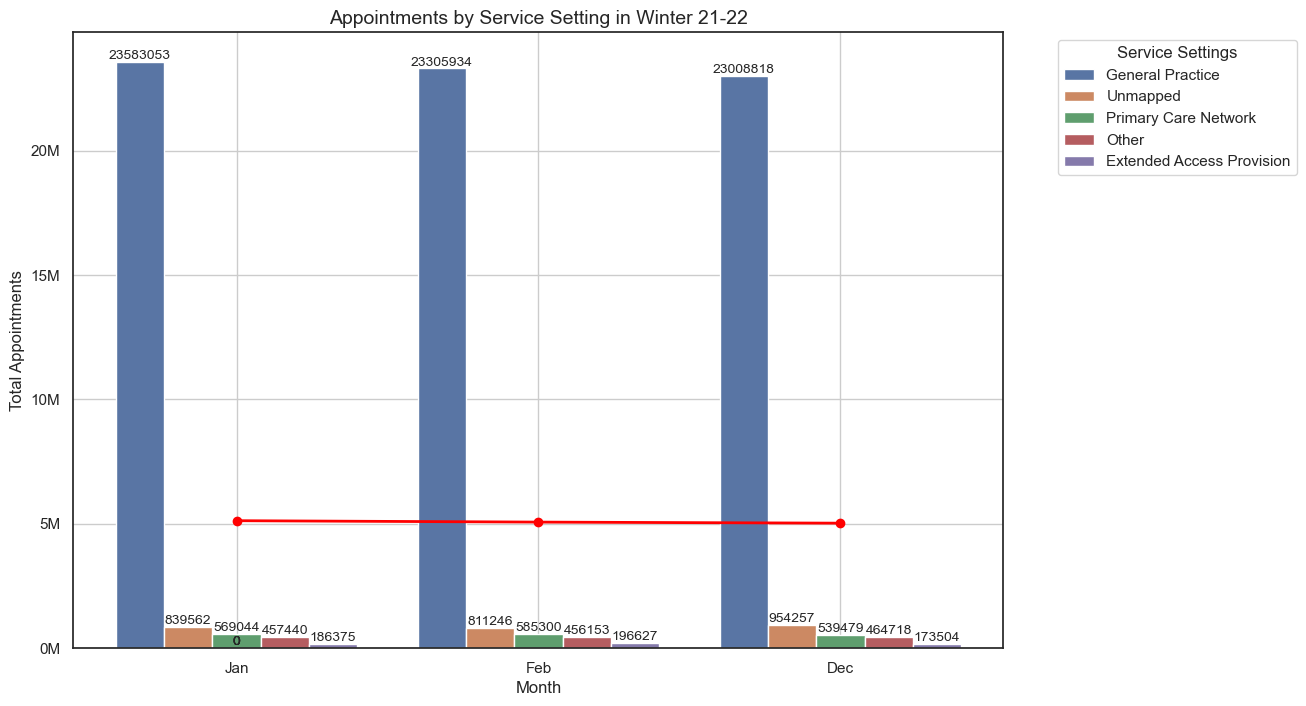

In [71]:
# Look at December to February 2022 in more detail to allow a closer look.
winter_21_22_melted = winter_21_22_pivot.reset_index().melt(
    id_vars="service_setting", var_name="Month", value_name="Appointments")

winter_21_22_melted = winter_21_22_melted.sort_values(
    "Appointments", ascending=False)

plt.figure
graph = sns.barplot(data=winter_21_22_melted, x="Month", y="Appointments", 
                    hue="service_setting", errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Appointments by Service Setting in Winter 21-22", fontsize=14)
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

for bar in graph.patches:
    height = int(bar.get_height())
    graph.text(bar.get_x() + bar.get_width() / 2, height, f"{height}",
               ha="center", va="bottom", fontsize=10)

y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

monthly_avg = winter_21_22_melted.groupby("Month")["Appointments"].mean()
plt.plot(monthly_avg.index, monthly_avg.values, color="red", linewidth=2, 
         label="Monthly Avg", marker="o")

plt.show()

**Spring (March to May 2022):**

In [73]:
spring_22_pivot = create_season_pivot(spring_22)
spring_22_pivot

month_name,Mar,Apr,May
service_setting,,,
Extended Access Provision,231905,192284,220511
General Practice,27187368,21916791,25238620
Other,530677,437402,503327
Primary Care Network,702176,606270,712280
Unmapped,942912,760313,820770


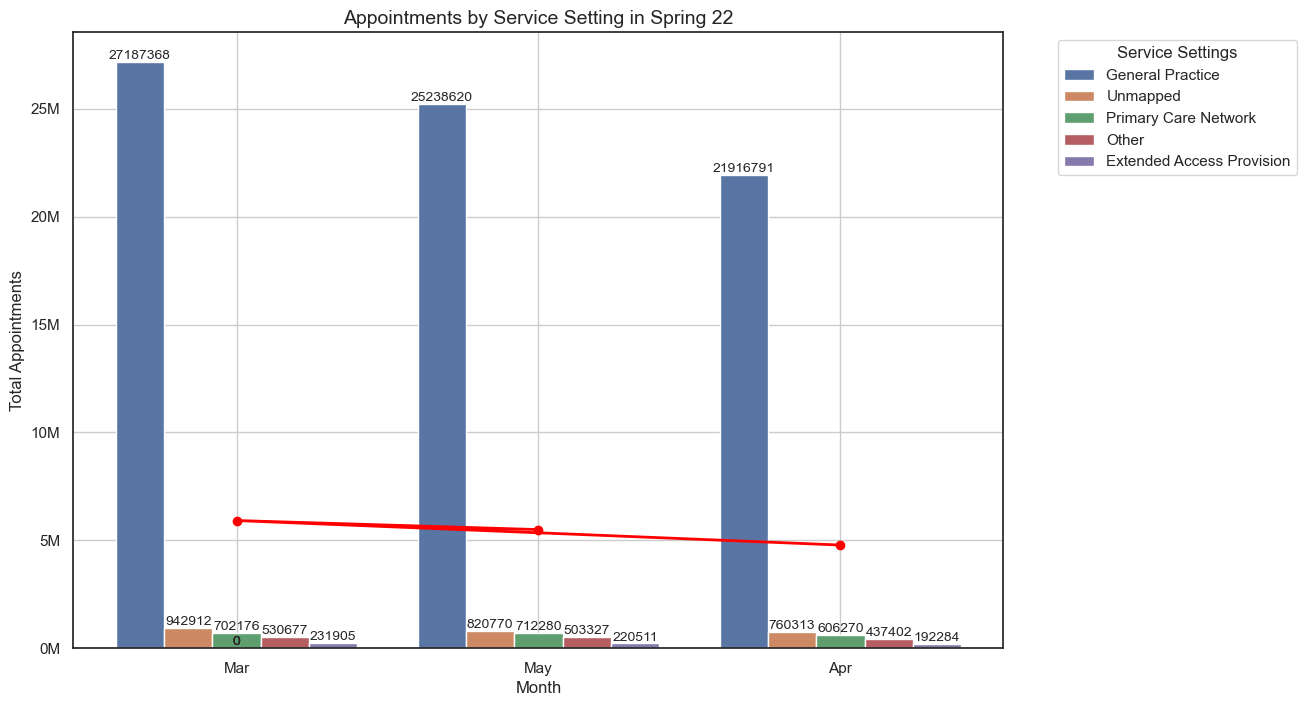

In [74]:
# Look at March to May 2022 in more detail to allow a closer look.
spring_22_melted = spring_22_pivot.reset_index().melt(
    id_vars="service_setting", var_name="Month", value_name="Appointments")

spring_22_melted = spring_22_melted.sort_values("Appointments", ascending=False)

plt.figure
graph = sns.barplot(data=spring_22_melted, x="Month", y="Appointments", 
                    hue="service_setting", errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Appointments by Service Setting in Spring 22", fontsize=14)
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

for bar in graph.patches:
    height = int(bar.get_height())
    graph.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=10)
    
monthly_avg = spring_22_melted.groupby("Month")["Appointments"].mean()
plt.plot(monthly_avg.index, monthly_avg.values, color="red", linewidth=2, 
         label="Monthly Avg", marker="o")

plt.show()

**Summer (June 2022):**

In [76]:
summer_22_pivot = create_season_pivot(summer_22)
summer_22_pivot

month_name,Jun
service_setting,
Extended Access Provision,209652
General Practice,23680374
Other,478813
Primary Care Network,700599
Unmapped,758640


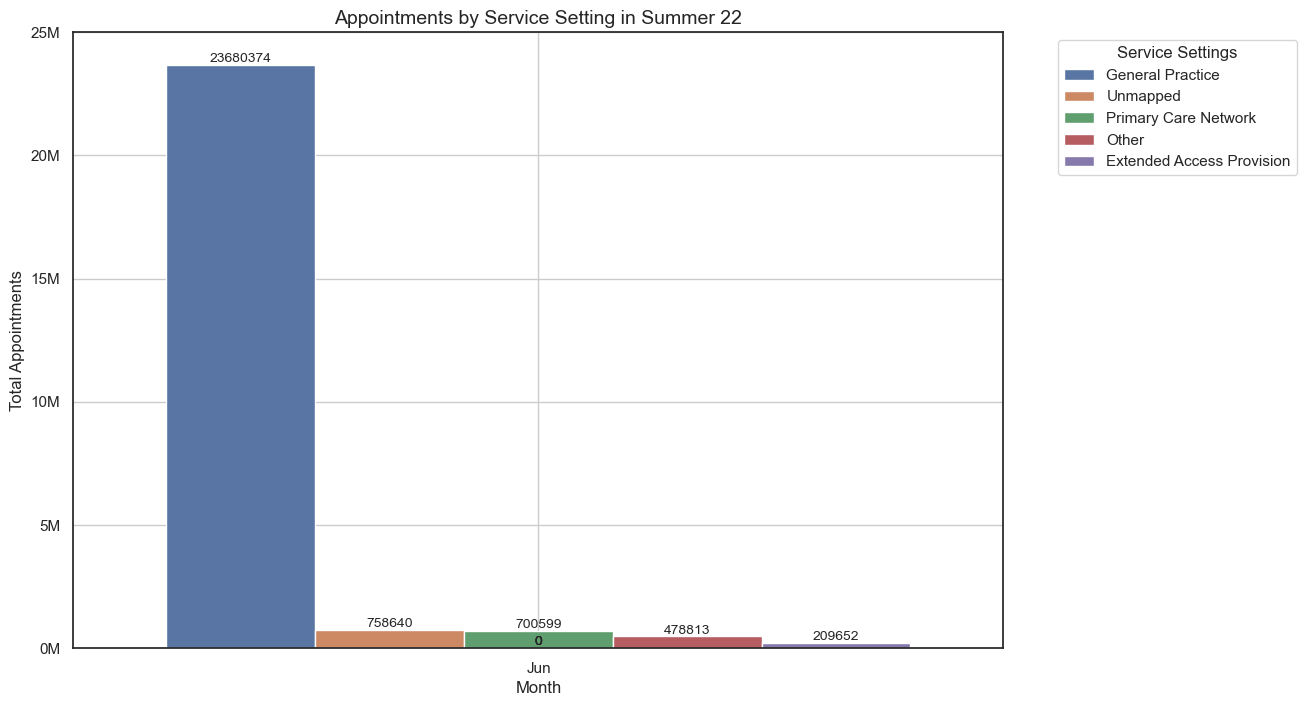

In [77]:
summer_22_melted = summer_22_pivot.reset_index().melt(
    id_vars="service_setting", var_name="Month", value_name="Appointments")

summer_22_melted = summer_22_melted.sort_values("Appointments", ascending=False)

plt.figure
graph = sns.barplot(data=summer_22_melted, x="Month", y="Appointments", 
                    hue="service_setting", errorbar=None)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Appointments", fontsize=12)
plt.title("Appointments by Service Setting in Summer 22", fontsize=14)
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

for bar in graph.patches:
    height = int(bar.get_height())
    graph.text(bar.get_x() + bar.get_width() / 2, height, f"{height}",
               ha="center", va="bottom", fontsize=10)

y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

# 

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [81]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [82]:
# Load the data set.
tweets = pd.read_csv("tweets.csv")
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [83]:
# Explore the metadata.
tweets.info()
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [84]:
# Create a new DataFrame containing only the text.

tweets_text = tweets[["tweet_full_text"]]

tweets_text.head()

tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

tag_counts = pd.Series(tags).value_counts()

tag_counts.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [85]:
tweets_expanded = tweets[["tweet_full_text", "tweet_retweet_count", 
                          "tweet_favorite_count"]].copy()

tag_data = []

for _, row in tweets.iterrows():
    words = row["tweet_full_text"].split()
    for word in words:
        if "#" in word:
            tag_data.append((word.lower(), row["tweet_retweet_count"], 
                             row["tweet_favorite_count"]))

tag_df = pd.DataFrame(tag_data, columns=["hashtag", "tweet_retweet_count", 
                                         "tweet_favorite_count"])

tag_aggregated = tag_df.groupby("hashtag")[[
    "tweet_retweet_count", "tweet_favorite_count"]].sum().reset_index()

tag_counts_df = tag_counts.reset_index()
tag_counts_df.columns = ["hashtag", "tweet_count"]

twitter_table = tag_counts_df.merge(tag_aggregated, on="hashtag", how="left")

twitter_table = twitter_table.sort_values("tweet_count", ascending=False)

twitter_table.head(30)

,hashtag,tweet_count,tweet_retweet_count,tweet_favorite_count
0,#healthcare,716,2783.0,400.0
1,#health,80,807.0,76.0
2,#medicine,41,389.0,62.0
3,#ai,40,1127.0,13.0
4,#job,38,27.0,1.0
5,#medical,35,387.0,60.0
6,#strategy,30,29.0,0.0
7,#pharmaceutical,28,24.0,1.0
8,#digitalhealth,25,744.0,15.0
9,#pharma,25,25.0,0.0


In [86]:
twitter_table = twitter_table.sort_values(
    "tweet_retweet_count", ascending=False)

twitter_table["tweet_retweet_total"] = twitter_table["tweet_retweet_count"] 
+ twitter_table["tweet_favorite_count"]

twitter_table.head(20)

,hashtag,tweet_count,tweet_retweet_count,tweet_favorite_count,tweet_retweet_total
0,#healthcare,716,2783.0,400.0,2783.0
3,#ai,40,1127.0,13.0,1127.0
1,#health,80,807.0,76.0,807.0
8,#digitalhealth,25,744.0,15.0,744.0
25,#healthtech,15,611.0,1.0,611.0
171,🔟#applications,4,600.0,0.0,600.0
168,#datascience,4,600.0,0.0,600.0
164,#analy…,4,600.0,0.0,600.0
114,#bigdata,5,600.0,1.0,600.0
93,#tipsfornewdocs,7,447.0,59.0,447.0


C:\Users\lotti\AppData\Local\Temp\ipykernel_19196\2386006961.py:31: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\lotti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


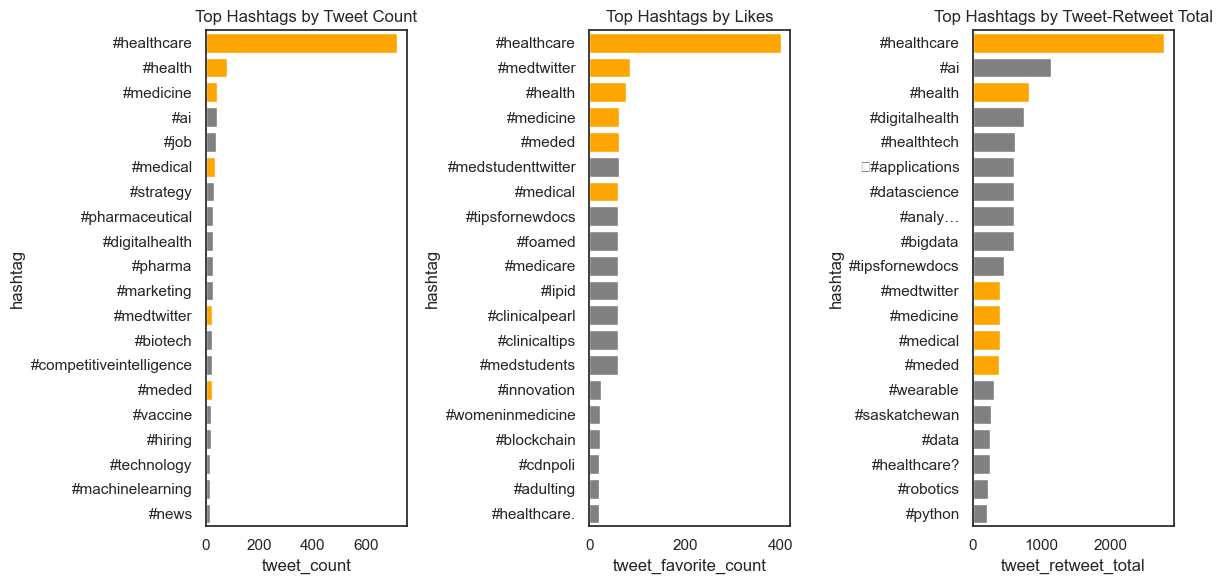

In [87]:
# Would it be useful to only look at retweeted and favourite tweet messages? Creating a graph that shows the relation between most tweeted, 
# liked and tweeted & retweeted, to display the importance of looking at all 3 indicators to define popular hashtags.

top_tweets = twitter_table.nlargest(20, "tweet_count")[[
    "hashtag", "tweet_count"]]
top_likes = twitter_table.nlargest(20, "tweet_favorite_count")[[
    "hashtag", "tweet_favorite_count"]]
top_tweets_retweets = twitter_table.nlargest(
    20, "tweet_retweet_total")[["hashtag", "tweet_retweet_total"]]

common_hashtags = set(top_tweets["hashtag"]) & set(
    top_likes["hashtag"]) & set(top_tweets_retweets["hashtag"])

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

def plot_colored_bars(data, x_col, y_col, ax):
    bars = sns.barplot(data=data, x=x_col, y=y_col, ax=ax, 
                       color="gray", errorbar=None)
    for bar, hashtag in zip(bars.containers[0], data["hashtag"]):
        if hashtag in common_hashtags: bar.set_facecolor("orange")

plot_colored_bars(top_tweets, "tweet_count", "hashtag", axes[0])
axes[0].set_title("Top Hashtags by Tweet Count")

plot_colored_bars(top_likes, "tweet_favorite_count", "hashtag", axes[1])
axes[1].set_title("Top Hashtags by Likes")

plot_colored_bars(top_tweets_retweets, "tweet_retweet_total", "hashtag", axes[2])
axes[2].set_title("Top Hashtags by Tweet-Retweet Total")

plt.tight_layout()
plt.show()

C:\Users\lotti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


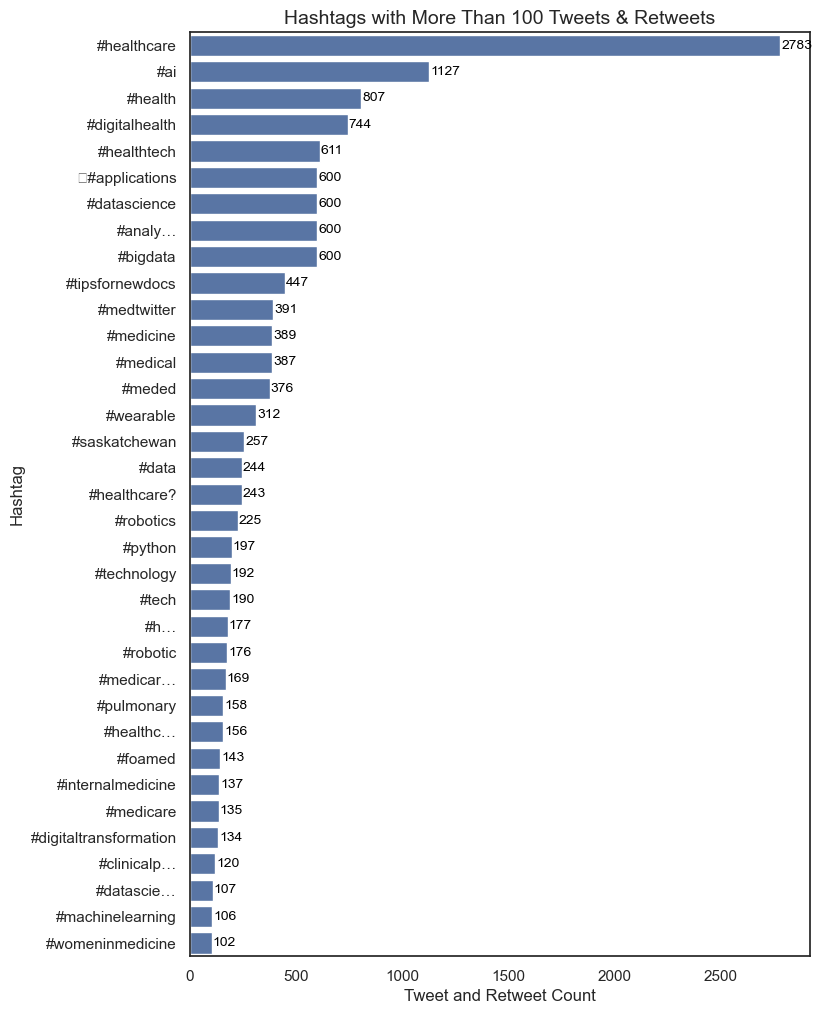

In [88]:
# Create a Seaborn barplot indicating records with a count >100 tweets & retweets.
filtered_data = twitter_table[twitter_table["tweet_retweet_count"] > 100]

plt.figure(figsize=(8, 12))
graph = sns.barplot(data=filtered_data, x="tweet_retweet_count", 
                    y="hashtag", errorbar=None)

for bar in graph.patches:
    width = bar.get_width()
    graph.text(
        width + 5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        ha="left", va="center", fontsize=10, color="black")

plt.xlabel("Tweet and Retweet Count", fontsize=12)
plt.ylabel("Hashtag", fontsize=12)
plt.title("Hashtags with More Than 100 Tweets & Retweets", fontsize=14)

plt.show()

In [89]:
# Identifying most common words to find anything alarming, e.g. covid, influenza, panic, etc.
filtered_tweets = tweets[tweets["tweet_entities_hashtags"]
.str.lower().str.contains("healthcare", na=False)]

tweet_full_text = " ".join(filtered_tweets[
                           "tweet_full_text"]).lower().split()

unique_words = set(tweet_full_text)
word_counts = {word: tweet_full_text.count(word) for word in unique_words}
word_counts = list(word_counts.items())
word_counts.sort(key=lambda x: x[1], reverse=True) 

print(word_counts[:50])

[('#healthcare', 785), ('to', 581), ('the', 521), ('in', 353), ('and', 332), ('for', 286), ('a', 282), ('of', 268), ('rt', 192), ('is', 184), ('our', 163), ('-', 129), ('you', 129), ('with', 124), ('on', 123), ('we', 107), ('are', 103), ('at', 99), ('this', 97), ('health', 97), ('be', 93), ('more', 89), ('your', 89), ('&amp;', 86), ('healthcare', 85), ('how', 78), ('can', 74), ('#health', 73), ('care', 73), ('as', 72), ('by', 72), ('about', 71), ('that', 68), ('from', 68), ('it', 57), ('learn', 57), ('have', 54), ('their', 48), ('job', 47), ('us', 45), ('will', 45), ('what', 44), ('new', 43), ('join', 41), ('or', 40), ('out', 39), ('help', 39), ('an', 38), ('i', 37), ('click', 36)]


# 

# Assignment activity 6

### Make recommendations to the NHS. 

In [93]:
# Load the appointments_regional.csv file.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_year
0,E54000034,1,Attended,GP,Face-to-Face,1 Day,8107,2020
1,E54000034,1,Attended,GP,Face-to-Face,15 to 21 Days,6791,2020
2,E54000034,1,Attended,GP,Face-to-Face,2 to 7 Days,20686,2020
3,E54000034,1,Attended,GP,Face-to-Face,22 to 28 Days,4268,2020
4,E54000034,1,Attended,GP,Face-to-Face,8 to 14 Days,11971,2020


In [94]:
# Print the min and max dates.
print("Earliest appointment:", ar_min_month.strftime("%Y-%m-%d"))
print("Latest appointment:", ar_max_month.strftime("%Y-%m-%d"))

Earliest appointment: 2020-01-01
Latest appointment: 2022-06-01


In [95]:
# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar = ar[(ar["appointment_year"] > 2021) 
| ((ar["appointment_year"] == 2021) & (ar["appointment_month"] >= 8))]
filtered_ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_year
3652,E54000034,8,Attended,GP,Face-to-Face,1 Day,6553,2021
3653,E54000034,8,Attended,GP,Face-to-Face,15 to 21 Days,2390,2021
3654,E54000034,8,Attended,GP,Face-to-Face,2 to 7 Days,10547,2021
3655,E54000034,8,Attended,GP,Face-to-Face,22 to 28 Days,937,2021
3656,E54000034,8,Attended,GP,Face-to-Face,8 to 14 Days,4961,2021
...,...,...,...,...,...,...,...,...
596813,E54000050,6,Unknown,Unknown,Telephone,Same Day,10,2022
596815,E54000050,6,Unknown,Unknown,Unknown,15 to 21 Days,13,2022
596816,E54000050,6,Unknown,Unknown,Unknown,2 to 7 Days,21,2022
596818,E54000050,6,Unknown,Unknown,Unknown,8 to 14 Days,28,2022


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [97]:
# Displaying appointment mode distribution
mode = filtered_ar.groupby("appointment_mode", as_index=False)[
"count_of_appointments"].sum()

total_appointments = mode["count_of_appointments"].sum()

mode["percentage"] = ((mode["count_of_appointments"] 
                             / total_appointments) * 100).round(1)
mode = mode.sort_values(by="count_of_appointments", ascending=False)

mode

,appointment_mode,count_of_appointments,percentage
0,Face-to-Face,183457603,62.0
2,Telephone,100237680,33.9
3,Unknown,8729565,2.9
1,Home Visit,1975204,0.7
4,Video/Online,1540555,0.5


In [98]:
# Displaying relation between hcp type and appointment mode
pivot_table = (
    filtered_ar.groupby(["appointment_mode", "hcp_type"])["count_of_appointments"]
    .sum().unstack())

pivot_table["GP percentage"] = (pivot_table["GP"] / pivot_table
                                .sum(axis=1)) * 100
pivot_table["GP percentage"] = pivot_table["GP percentage"].round(1)

pivot_table

hcp_type,GP,Other Practice staff,Unknown,GP percentage
appointment_mode,,,,
Face-to-Face,75149783,106401462,1906358,41.0
Home Visit,821878,890930,262396,41.6
Telephone,70152247,28334498,1750935,70.0
Unknown,1476503,1497787,5755275,16.9
Video/Online,727233,809890,3432,47.2


In [99]:
# Displaying distribution of different time between book and appointment
book_time = filtered_ar.groupby("time_between_book_and_appointment", 
                                as_index=False)["count_of_appointments"].sum()

total_appointments = book_time["count_of_appointments"].sum()

book_time["percentage"] = ((book_time["count_of_appointments"] 
                            / total_appointments) * 100).round(1)
book_time = book_time.sort_values(by="count_of_appointments", 
                                  ascending=False)

book_time

,time_between_book_and_appointment,count_of_appointments,percentage
6,Same Day,130964160,44.3
2,2 to 7 Days,60720229,20.5
4,8 to 14 Days,37490409,12.7
0,1 Day,25854059,8.7
1,15 to 21 Days,19437514,6.6
3,22 to 28 Days,11417519,3.9
5,More than 28 Days,9868508,3.3
7,Unknown / Data Quality,188209,0.1


In [100]:
# Displaying time between_book and appointment in relation to appointment mode
time_book_mode = filtered_ar.groupby([
    "time_between_book_and_appointment", 
    "appointment_mode"], as_index=False)["count_of_appointments"].sum()

total_mode = time_book_mode.groupby(
    "appointment_mode")["count_of_appointments"].sum().reset_index()
total_mode.columns = ["appointment_mode", "total_appointments"]

time_book_mode = time_book_mode.merge(total_mode, on="appointment_mode")

time_book_mode["percentage"] = ((time_book_mode["count_of_appointments"] 
                                 / time_book_mode["total_appointments"]) * 100).round(1)

pivot_table = time_book_mode.pivot(index="appointment_mode", 
                                   columns="time_between_book_and_appointment", values="percentage")

sorted = ["Same Day"] + [col for col in pivot_table.columns if col != "Same Day"]
pivot_table = pivot_table[sorted]

pivot_table

time_between_book_and_appointment,Same Day,1 Day,15 to 21 Days,2 to 7 Days,22 to 28 Days,8 to 14 Days,More than 28 Days,Unknown / Data Quality
appointment_mode,,,,,,,,
Face-to-Face,35.9,8.8,7.9,23.1,4.7,15.2,4.4,0.1
Home Visit,56.5,14.4,2.2,17.6,1.4,5.5,1.6,0.7
Telephone,58.9,8.5,4.3,16.0,2.4,8.4,1.4,0.1
Unknown,51.1,8.4,5.2,18.8,3.0,10.3,3.2,0.1
Video/Online,33.5,14.8,7.3,22.5,4.3,13.3,4.3,0.1


In [101]:
# Determine the average daily utilization per month
monthly_appointments = filtered_ar.groupby([
    "appointment_year", "appointment_month"], as_index=False)["count_of_appointments"].sum()
monthly_appointments["appointment_month"] = monthly_appointments[
    "appointment_month"].apply(lambda x: calendar.month_name[x])

monthly_appointments["avg_daily_utilization"] = (monthly_appointments[
    "count_of_appointments"] / 30).round(1)

monthly_appointments

,appointment_year,appointment_month,count_of_appointments,avg_daily_utilization
0,2021,August,23843177,794772.6
1,2021,September,28514685,950489.5
2,2021,October,30296850,1009895.0
3,2021,November,30395923,1013197.4
4,2021,December,25132174,837739.1
5,2022,January,25623928,854130.9
6,2022,February,25344812,844827.1
7,2022,March,29586020,986200.7
8,2022,April,23904960,796832.0
9,2022,May,27478652,915955.1


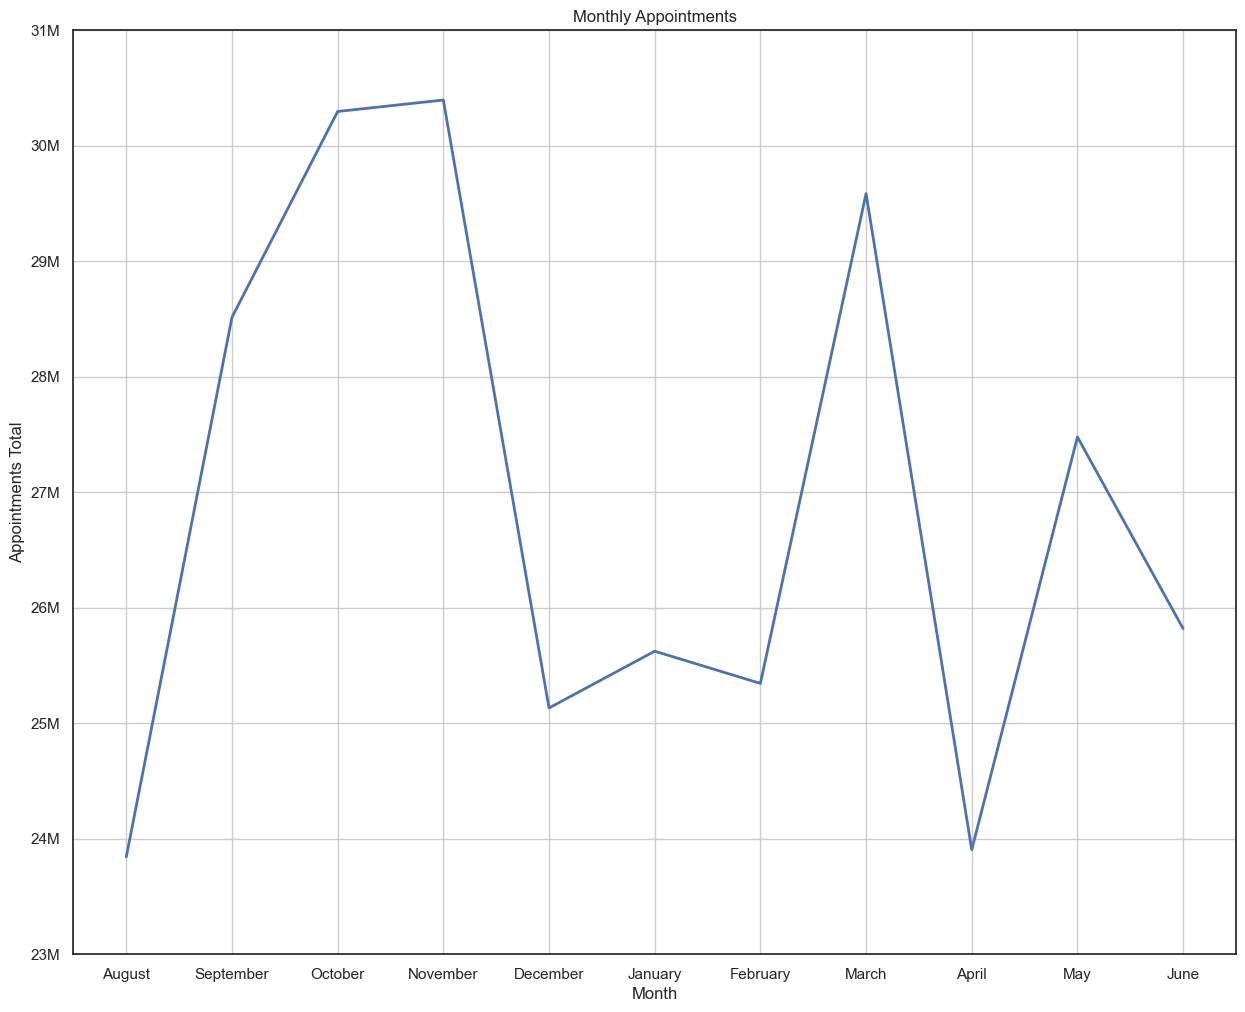

In [102]:
# Visualising monthly appointment total evolution

monthly_appointments["appointment_month"] = monthly_appointments[
    "appointment_month"].astype(str)

plt.figure

sns.lineplot(data=monthly_appointments, x="appointment_month", 
             y="count_of_appointments", linewidth=2, errorbar=None)

plt.xlabel("Month")
plt.ylabel("Appointments Total")
plt.title("Monthly Appointments")
plt.grid(True)

y_labels = [f"{int(label / 1e6)}M" for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

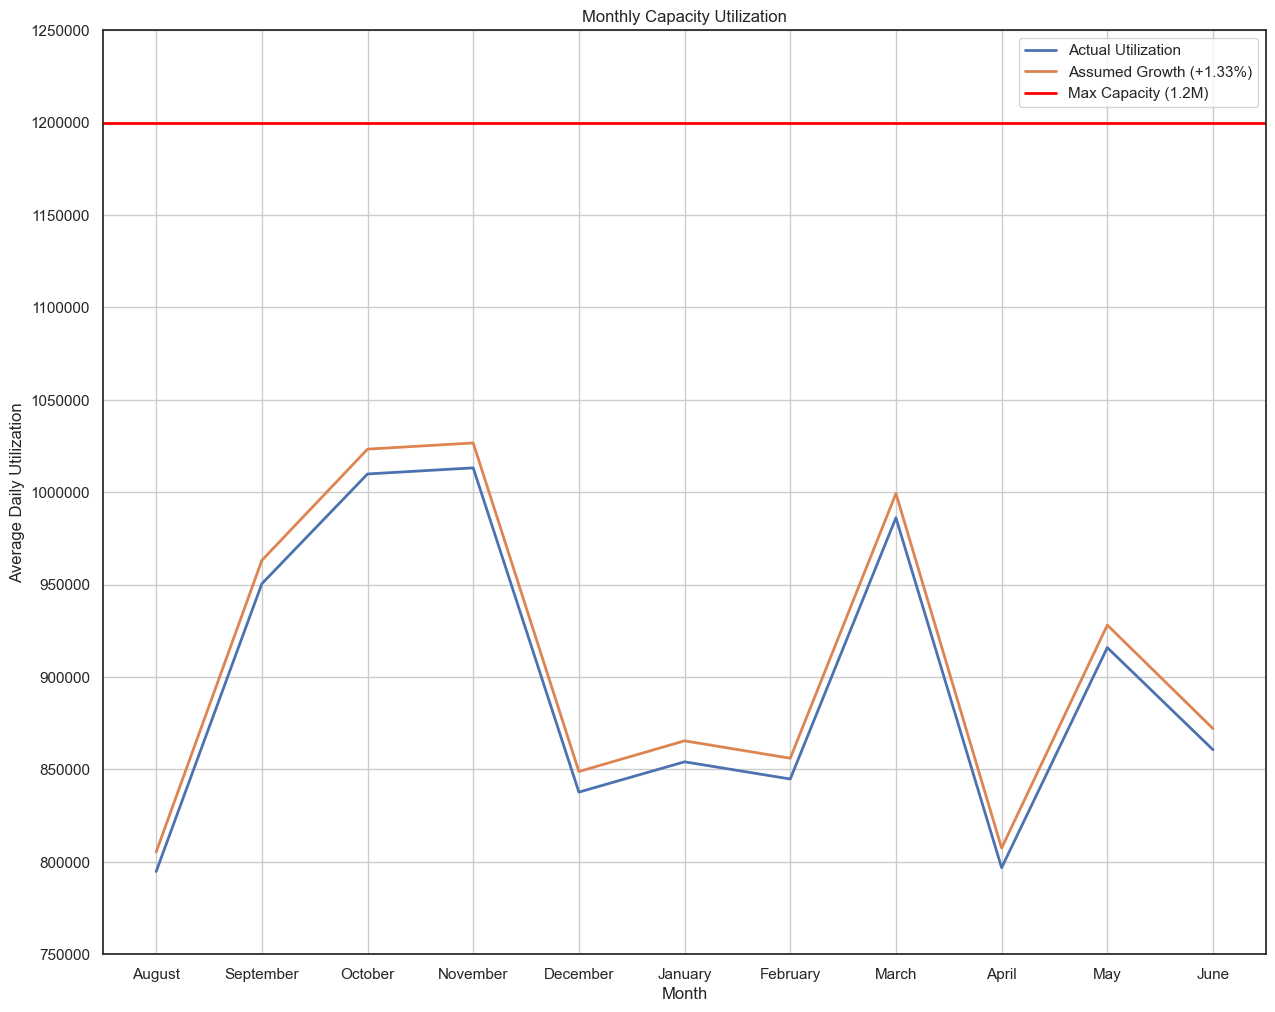

In [203]:
# Visualising avg daily utilization by month vs max capacity provided by NHS

# Adding assumed growth 2022 in order to determine whether forecasted population growth would make us hit max capacity.
monthly_appointments["assumed_population_growth"] = monthly_appointments["avg_daily_utilization"] * 1.0133

plt.figure
sns.lineplot(data=monthly_appointments, x="appointment_month", 
             y="avg_daily_utilization", linewidth=2, errorbar=None, label="Actual Utilization")

sns.lineplot(data=monthly_appointments, x="appointment_month", 
             y="assumed_population_growth", linewidth=2, label="Assumed Growth (+1.33%)", errorbar=None)

plt.axhline(y=1_200_000, color="red", linewidth=2, label="Max Capacity (1.2M)")

plt.ylabel("Average Daily Utilization")
plt.xlabel("Month")
plt.title("Monthly Capacity Utilization")
plt.grid(True)

y_labels = [int(label) for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.legend()
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

In [105]:
filtered_ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_year
3652,E54000034,8,Attended,GP,Face-to-Face,1 Day,6553,2021
3653,E54000034,8,Attended,GP,Face-to-Face,15 to 21 Days,2390,2021
3654,E54000034,8,Attended,GP,Face-to-Face,2 to 7 Days,10547,2021
3655,E54000034,8,Attended,GP,Face-to-Face,22 to 28 Days,937,2021
3656,E54000034,8,Attended,GP,Face-to-Face,8 to 14 Days,4961,2021
...,...,...,...,...,...,...,...,...
596813,E54000050,6,Unknown,Unknown,Telephone,Same Day,10,2022
596815,E54000050,6,Unknown,Unknown,Unknown,15 to 21 Days,13,2022
596816,E54000050,6,Unknown,Unknown,Unknown,2 to 7 Days,21,2022
596818,E54000050,6,Unknown,Unknown,Unknown,8 to 14 Days,28,2022


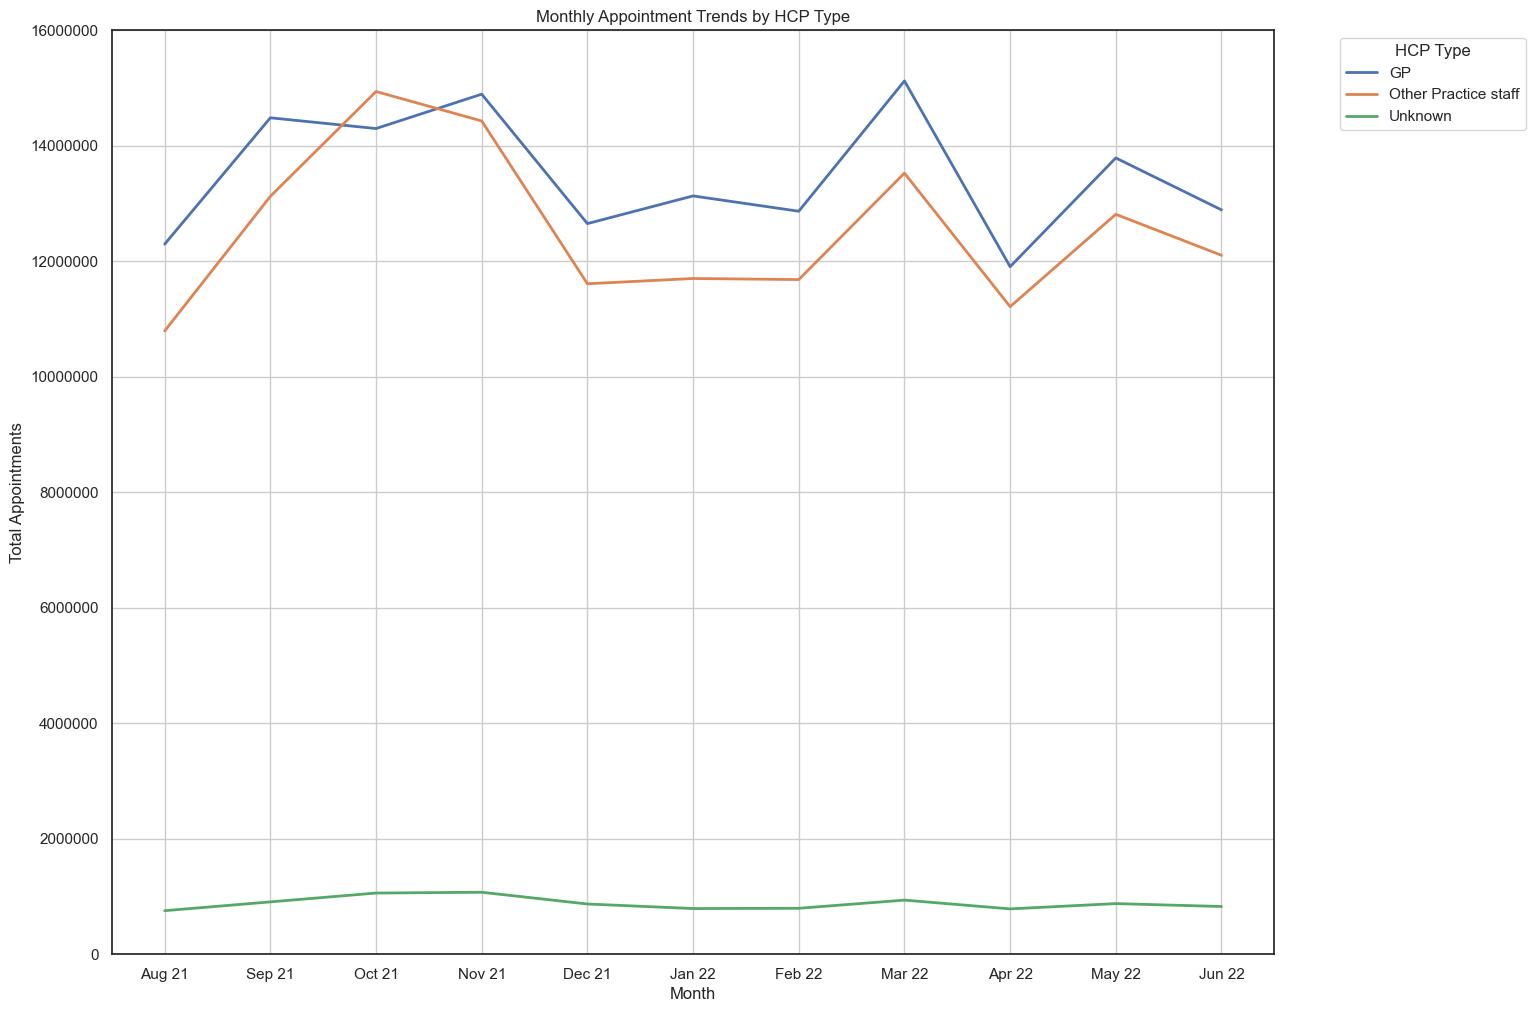

In [106]:
monthly_totals = filtered_ar.copy()
monthly_totals["year_month"] = monthly_totals.apply(
    lambda row: f"{row["appointment_year"]}-{row[
    "appointment_month"]:02d}", axis=1)

monthly_totals["month_name"] = monthly_totals[
"appointment_month"].apply(lambda x: calendar.month_abbr[x])
monthly_totals["year_short"] = monthly_totals[
"appointment_year"].astype(str).str[-2:]
monthly_totals["year_month_display"] = monthly_totals[
"month_name"] + " " + monthly_totals["year_short"]

hcp_monthly_appointments = monthly_totals.groupby([
    "year_month", "hcp_type"], as_index=False)["count_of_appointments"].sum()

hcp_monthly_appointments = hcp_monthly_appointments.merge(
    monthly_totals[["year_month", "year_month_display"]]
    .drop_duplicates(), on="year_month")

hcp_monthly_appointments = hcp_monthly_appointments.sort_values("year_month")
hcp_monthly_appointments["year_month"] = hcp_monthly_appointments[
"year_month_display"]

plt.figure
sns.lineplot(data=hcp_monthly_appointments, x="year_month", 
             y="count_of_appointments", hue="hcp_type", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Total Appointments")
plt.title("Monthly Appointment Trends by HCP Type")
plt.legend(title="HCP Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

y_labels = [int(label) for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

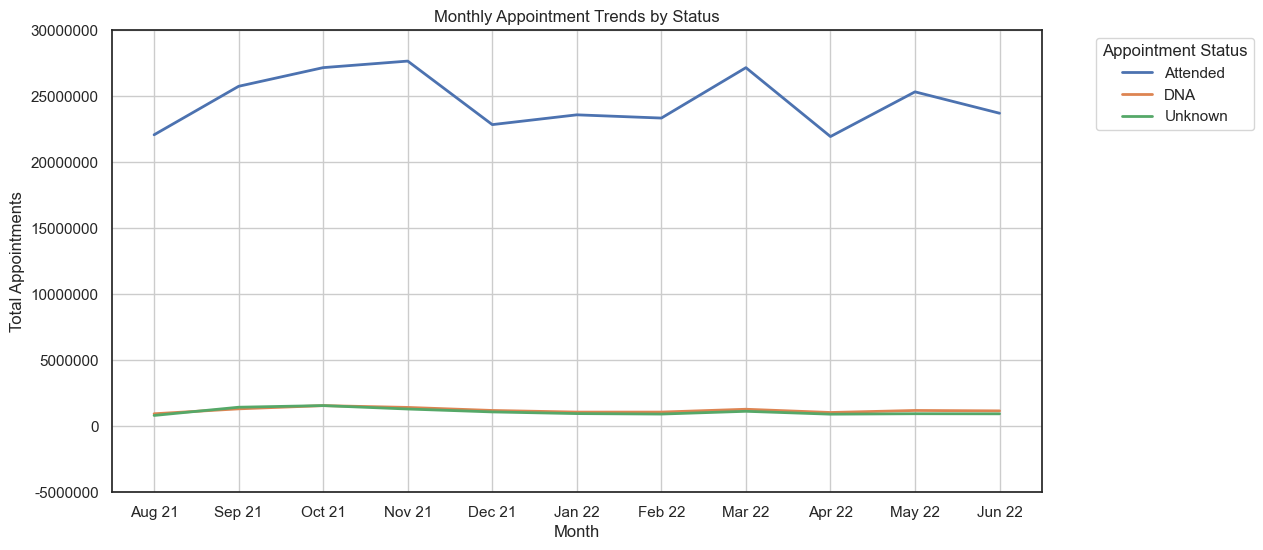

In [108]:
# Create a line plot to answer the question.

monthly_totals = filtered_ar.copy()
monthly_totals["year_month"] = monthly_totals.apply(
    lambda row: f"{row["appointment_year"]}-{row[
    "appointment_month"]:02d}", axis=1)

monthly_totals["month_name"] = monthly_totals[
"appointment_month"].apply(lambda x: calendar.month_abbr[x])
monthly_totals["year_short"] = monthly_totals[
"appointment_year"].astype(str).str[-2:]
monthly_totals["year_month_display"] = monthly_totals[
"month_name"] + " " + monthly_totals["year_short"]

appointment_status_monthly = monthly_totals.groupby([
    "year_month", "appointment_status"], as_index=False)[
"count_of_appointments"].sum()

appointment_status_monthly = appointment_status_monthly.merge(
    monthly_totals[["year_month", "year_month_display"]].drop_duplicates(),
    on="year_month")

appointment_status_monthly = appointment_status_monthly.sort_values(
    "year_month")
appointment_status_monthly["year_month"] = appointment_status_monthly[
"year_month_display"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=appointment_status_monthly, x="year_month", 
             y="count_of_appointments", hue="appointment_status", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Total Appointments")
plt.title("Monthly Appointment Trends by Status")
plt.legend(title="Appointment Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

y_labels = [int(label) for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()


In [109]:
# Pivot table with time_between_book_and_appointment as rows and appointment_status as columns
appointment_pivot = (filtered_ar.groupby([
    "time_between_book_and_appointment", "appointment_status"])
    ["count_of_appointments"]
    .sum().unstack(fill_value=0))

appointment_pivot["Total"] = appointment_pivot.sum(axis=1)

appointment_pivot["Attended (%)"] = (appointment_pivot["Attended"] 
                                     / appointment_pivot["Total"] * 100).round(1)

appointment_pivot = appointment_pivot.sort_values(
    by="Attended (%)", ascending=False)

appointment_pivot

appointment_status,Attended,DNA,Unknown,Total,Attended (%)
time_between_book_and_appointment,,,,,
Same Day,125796242,2284169,2883749,130964160,96.1
1 Day,24003592,1039523,810944,25854059,92.8
2 to 7 Days,54636124,3689732,2394373,60720229,90.0
8 to 14 Days,32523007,2864860,2102542,37490409,86.8
15 to 21 Days,16506091,1563712,1367711,19437514,84.9
22 to 28 Days,9474372,931458,1011689,11417519,83.0
More than 28 Days,7539601,907394,1421513,9868508,76.4
Unknown / Data Quality,138394,4948,44867,188209,73.5


In [110]:
# Pivot table with appointment_mode as rows and appointment_status as columns
appointment_pivot = (filtered_ar.groupby([
    "appointment_mode", "appointment_status"])["count_of_appointments"]
    .sum().unstack(fill_value=0))

appointment_pivot["Total"] = appointment_pivot.sum(axis=1)
appointment_pivot["Attended (%)"] = (appointment_pivot["Attended"] 
                                     / appointment_pivot["Total"] * 100).round(1)

appointment_pivot = appointment_pivot.sort_values(
    by="Attended (%)", ascending=False)

appointment_pivot

appointment_status,Attended,DNA,Unknown,Total,Attended (%)
appointment_mode,,,,,
Telephone,95350959,2081545,2805176,100237680,95.1
Video/Online,1414513,76820,49222,1540555,91.8
Unknown,7838384,304109,587072,8729565,89.8
Face-to-Face,164507523,10747016,8203064,183457603,89.7
Home Visit,1506044,76306,392854,1975204,76.2


**Question 4:** Are there changes in terms of appointment type and the busiest months?

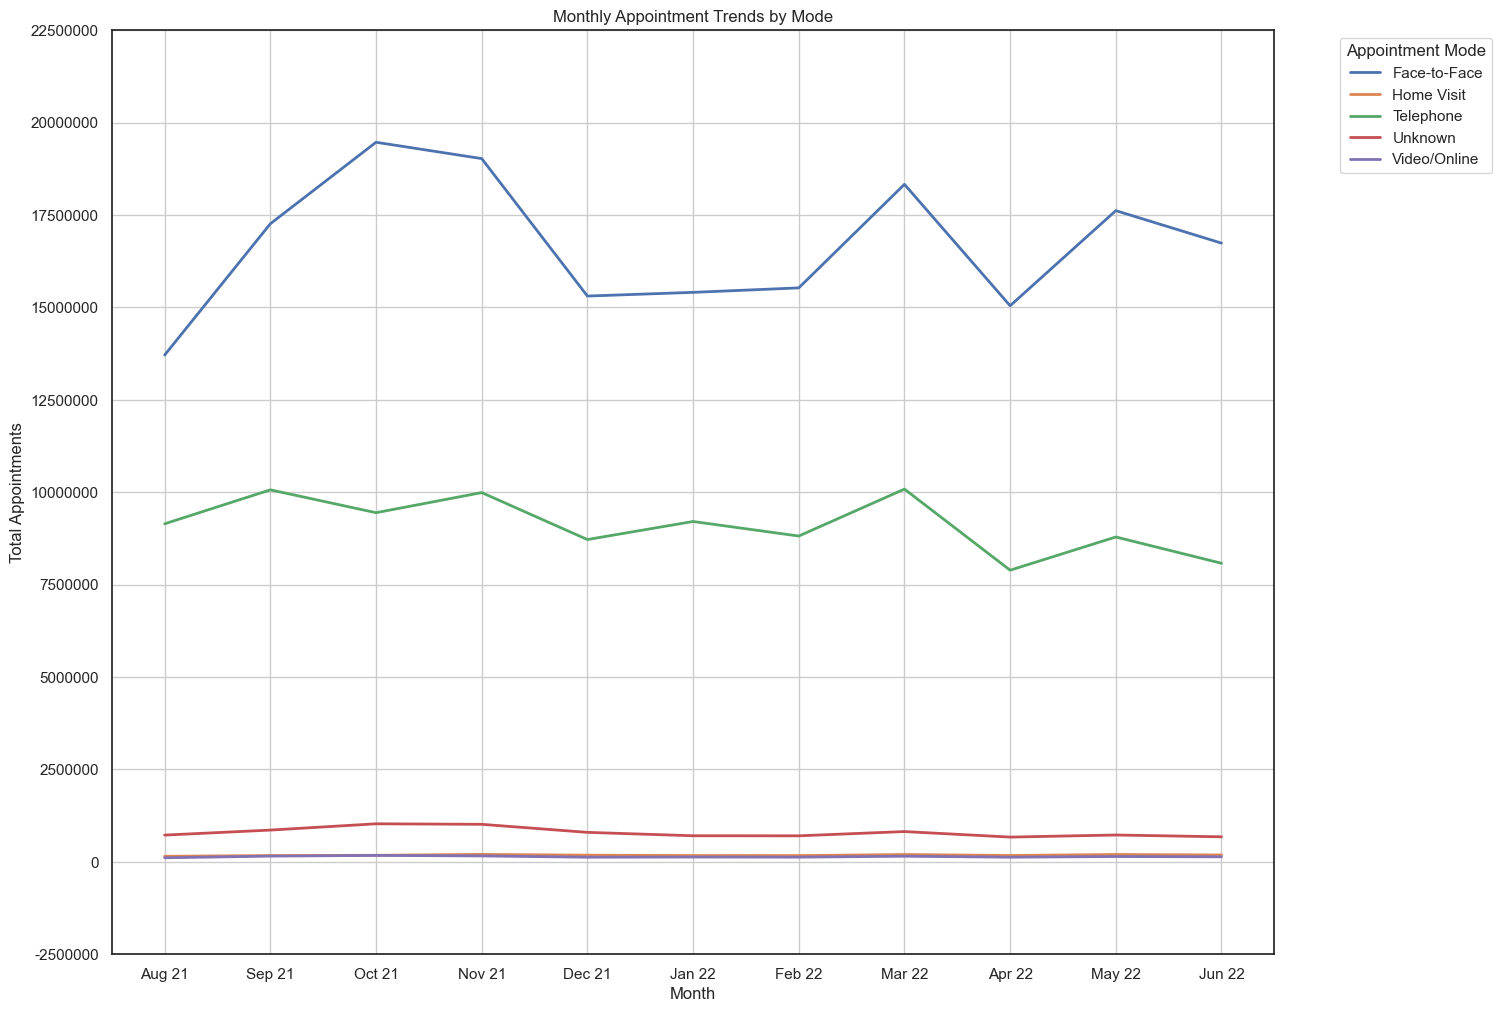

In [112]:
# Create a line plot to answer the question.
monthly_totals = filtered_ar.copy()
monthly_totals["year_month"] = monthly_totals.apply(
    lambda row: f"{row["appointment_year"]}-{row["appointment_month"]:02d}", axis=1)

monthly_totals["month_name"] = monthly_totals[
"appointment_month"].apply(lambda x: calendar.month_abbr[x])
monthly_totals["year_short"] = monthly_totals[
"appointment_year"].astype(str).str[-2:]
monthly_totals["year_month_display"] = monthly_totals[
"month_name"] + " " + monthly_totals["year_short"]

appointment_mode_monthly = monthly_totals.groupby([
    "year_month", "appointment_mode"], as_index=False)[
"count_of_appointments"].sum()

appointment_mode_monthly = appointment_mode_monthly.merge(
    monthly_totals[["year_month", "year_month_display"]].drop_duplicates(),
    on="year_month")

appointment_mode_monthly = appointment_mode_monthly.sort_values("year_month")
appointment_mode_monthly["year_month"] = appointment_mode_monthly[
"year_month_display"]

plt.figure
sns.lineplot(data=appointment_mode_monthly, x="year_month", 
             y="count_of_appointments", hue="appointment_mode", linewidth=2)

plt.xlabel("Month")
plt.ylabel("Total Appointments")
plt.title("Monthly Appointment Trends by Mode")
plt.legend(title="Appointment Mode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

y_labels = [int(label) for label in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_labels)

plt.show()

**Question 5:** Are there any trends in time between booking and appointment?

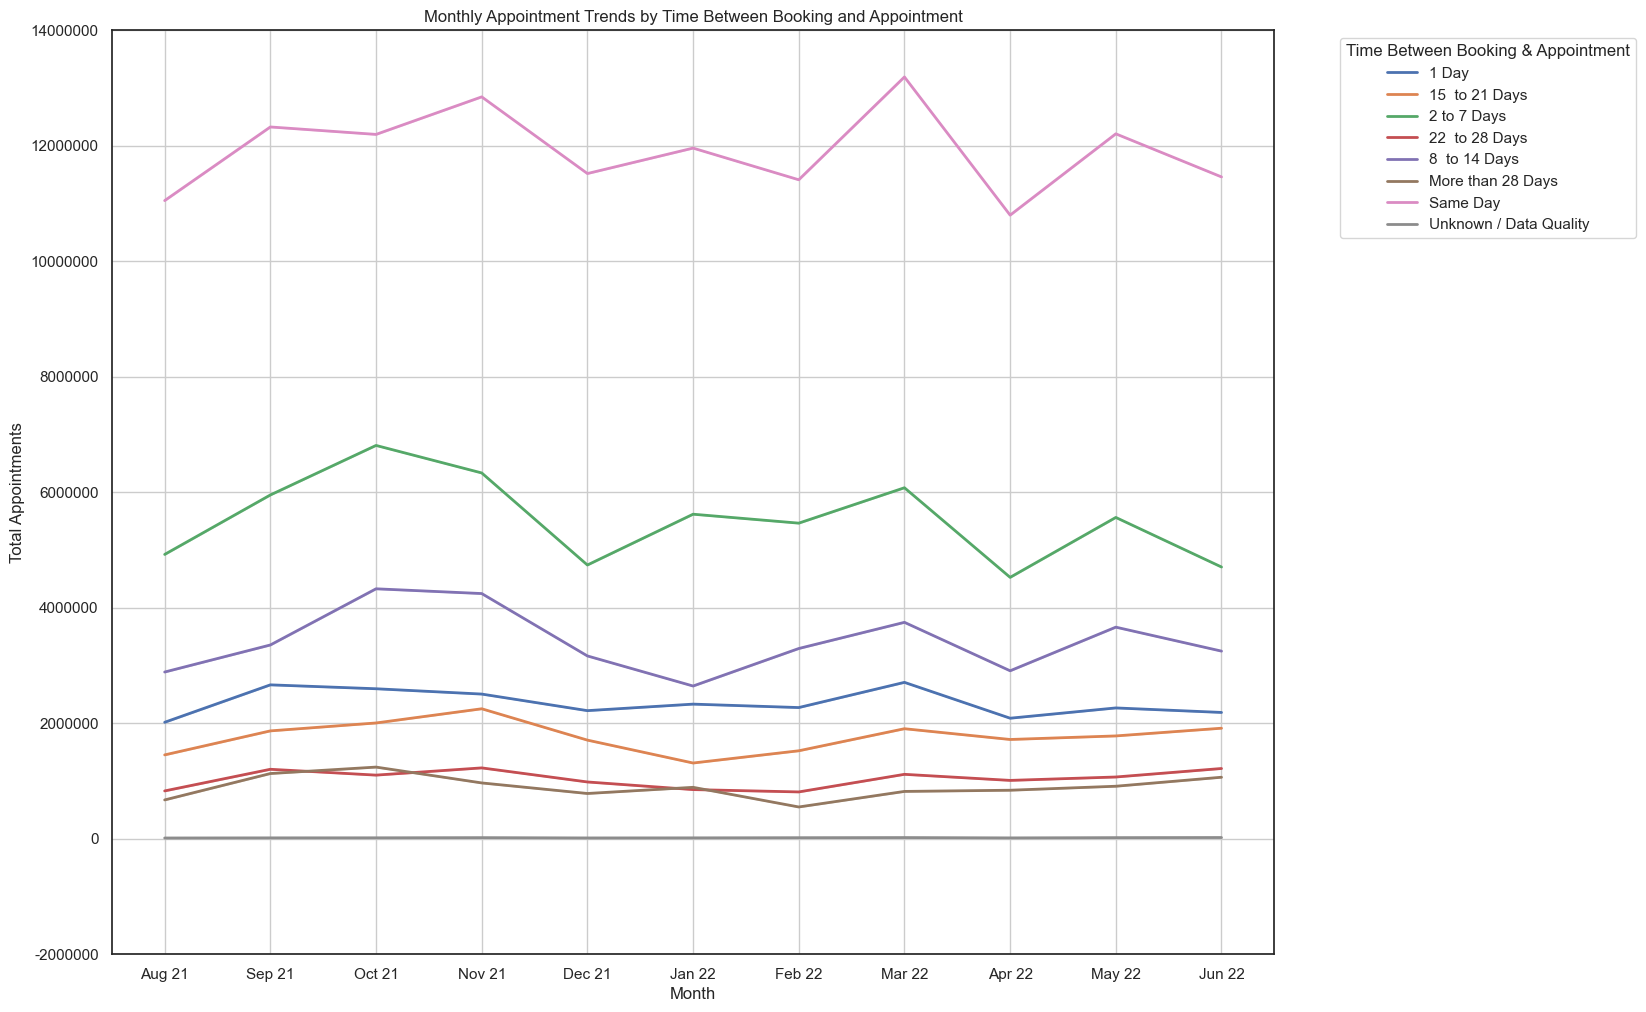

In [114]:
# Create a line plot to answer the question.

time_between_monthly = monthly_totals.groupby(
    ["year_month", "time_between_book_and_appointment"], 
    as_index=False)["count_of_appointments"].sum()

time_between_monthly = time_between_monthly.merge(
    monthly_totals[["year_month", "year_month_display"]].sort_values("year_month"))

time_between_monthly["year_month"] = time_between_monthly["year_month_display"]

plt.figure
sns.lineplot(data=time_between_monthly, x="year_month", 
             y="count_of_appointments", hue="time_between_book_and_appointment", 
             linewidth=2)

plt.xlabel("Month")
plt.ylabel("Total Appointments")
plt.title("Monthly Appointment Trends by Time Between Booking and Appointment")

plt.legend(title="Time Between Booking & Appointment", 
           bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.yticks(plt.yticks()[0], [int(label) for label in plt.yticks()[0]])

plt.show()

In [115]:
# Group by location and time between booking & appointment
booking_trends_location = ar.groupby([
    "icb_ons_code", "time_between_book_and_appointment"], as_index=False)[
"count_of_appointments"].sum()

total_per_icb = booking_trends_location.groupby("icb_ons_code")[
"count_of_appointments"].sum().reset_index()
total_per_icb.columns = ["icb_ons_code", "total_appointments"]

booking_trends_location = booking_trends_location.merge(
    total_per_icb, on="icb_ons_code")

booking_trends_location["percentage"] = (booking_trends_location[
                                         "count_of_appointments"] 
                                         / booking_trends_location[
                                         "total_appointments"]) * 100

booking_trends_location["percentage"] = booking_trends_location[
"percentage"].round(1)

pivot_table = booking_trends_location.pivot(index="icb_ons_code", 
                                            columns="time_between_book_and_appointment", 
                                            values="percentage")

pivot_table["Total Appointments"] = total_per_icb.set_index(
    "icb_ons_code")["total_appointments"]

pivot_table = pivot_table.sort_values(by="Total Appointments", ascending=False)

pivot_table

time_between_book_and_appointment,1 Day,15 to 21 Days,2 to 7 Days,22 to 28 Days,8 to 14 Days,More than 28 Days,Same Day,Unknown / Data Quality,Total Appointments
icb_ons_code,,,,,,,,,
E54000050,9.1,5.8,21.8,3.4,12.5,3.0,44.4,0.0,43054121
E54000054,9.6,5.9,19.3,3.5,11.2,4.0,46.5,0.0,36075020
E54000057,9.5,6.1,20.5,3.6,11.7,2.8,45.7,0.0,34003953
E54000008,10.2,5.1,20.1,2.9,10.8,2.2,48.7,0.0,33064205
E54000027,11.5,4.6,24.0,2.2,11.5,1.5,44.7,0.1,29380767
E54000029,12.0,3.9,23.6,2.0,9.9,1.3,47.1,0.3,23594259
E54000042,8.8,6.4,20.2,3.7,12.4,3.3,45.1,0.1,22968118
E54000051,9.0,6.0,22.1,3.7,12.6,3.5,42.9,0.0,22964301
E54000032,9.1,6.3,20.4,3.9,12.1,3.5,44.7,0.0,22623978


**Question 6:** How do the various service settings compare?

In [117]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,appointment_year,appointment_year_month,month_name
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,8,2021,2021-08,Aug
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,8,2021,2021-08,Aug
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,8,2021,2021-08,Aug
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,8,2021,2021-08,Aug
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,8,2021,2021-08,Aug


In [118]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

monthly_appointments_nc = nc.groupby(
    "appointment_year_month", as_index=False)["count_of_appointments"].sum()

monthly_appointments_nc

,appointment_year_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776
5,2022-01,25635474
6,2022-02,25355260
7,2022-03,29595038
8,2022-04,23913060
9,2022-05,27495508


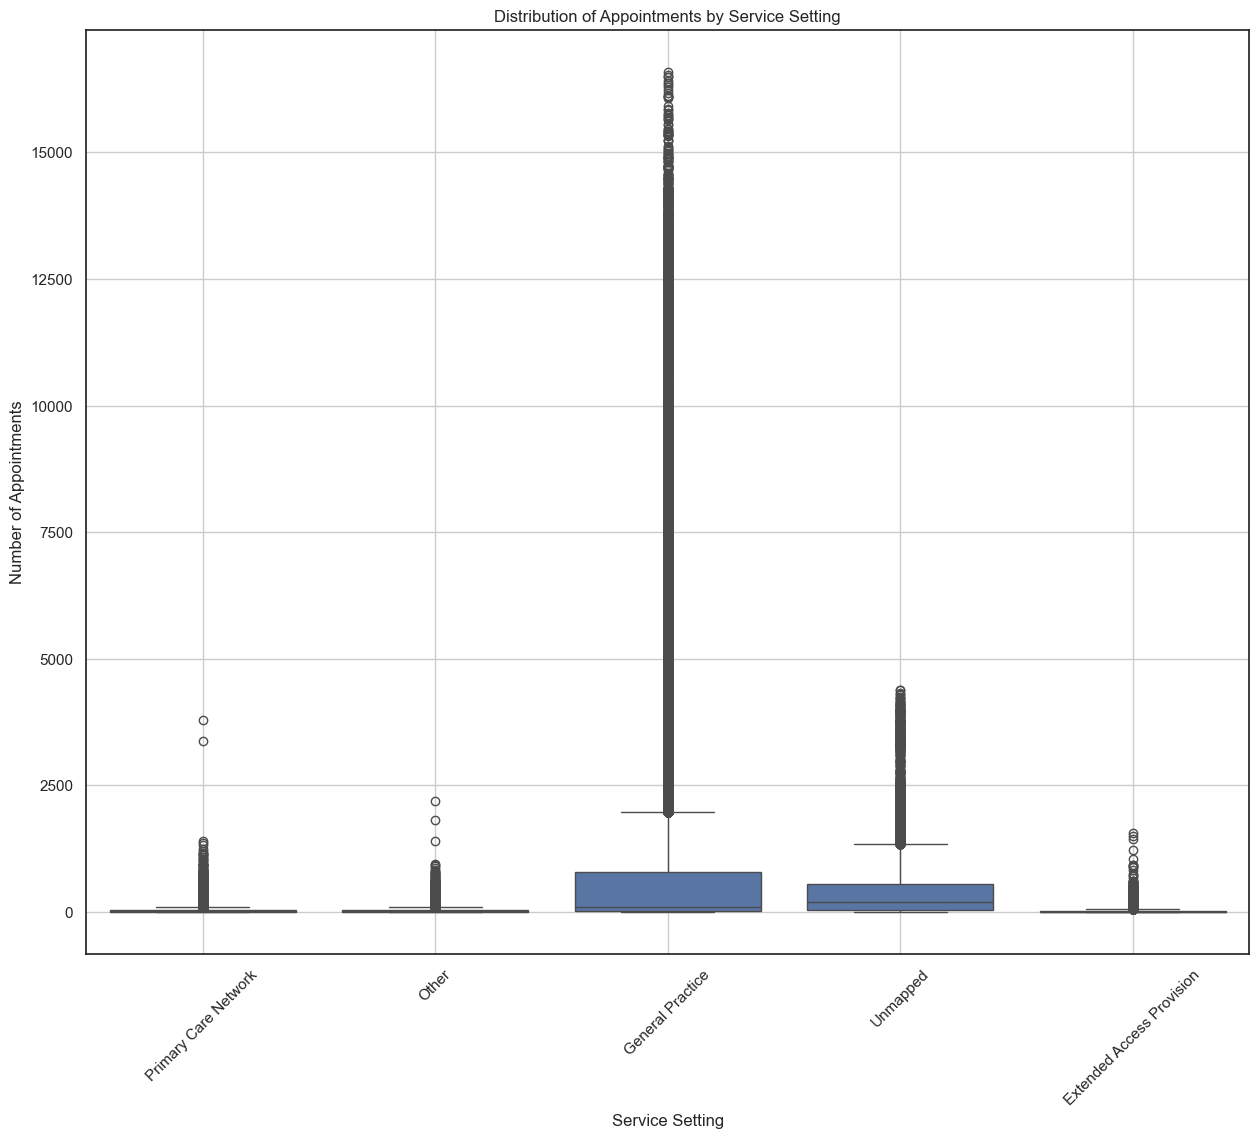

In [119]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.

plt.figure

sns.boxplot(data=nc, x="service_setting", y="count_of_appointments")

plt.xticks(rotation=45)
plt.xlabel("Service Setting")
plt.ylabel("Number of Appointments")
plt.title("Distribution of Appointments by Service Setting")
plt.grid(True)

plt.show()

plt.show()

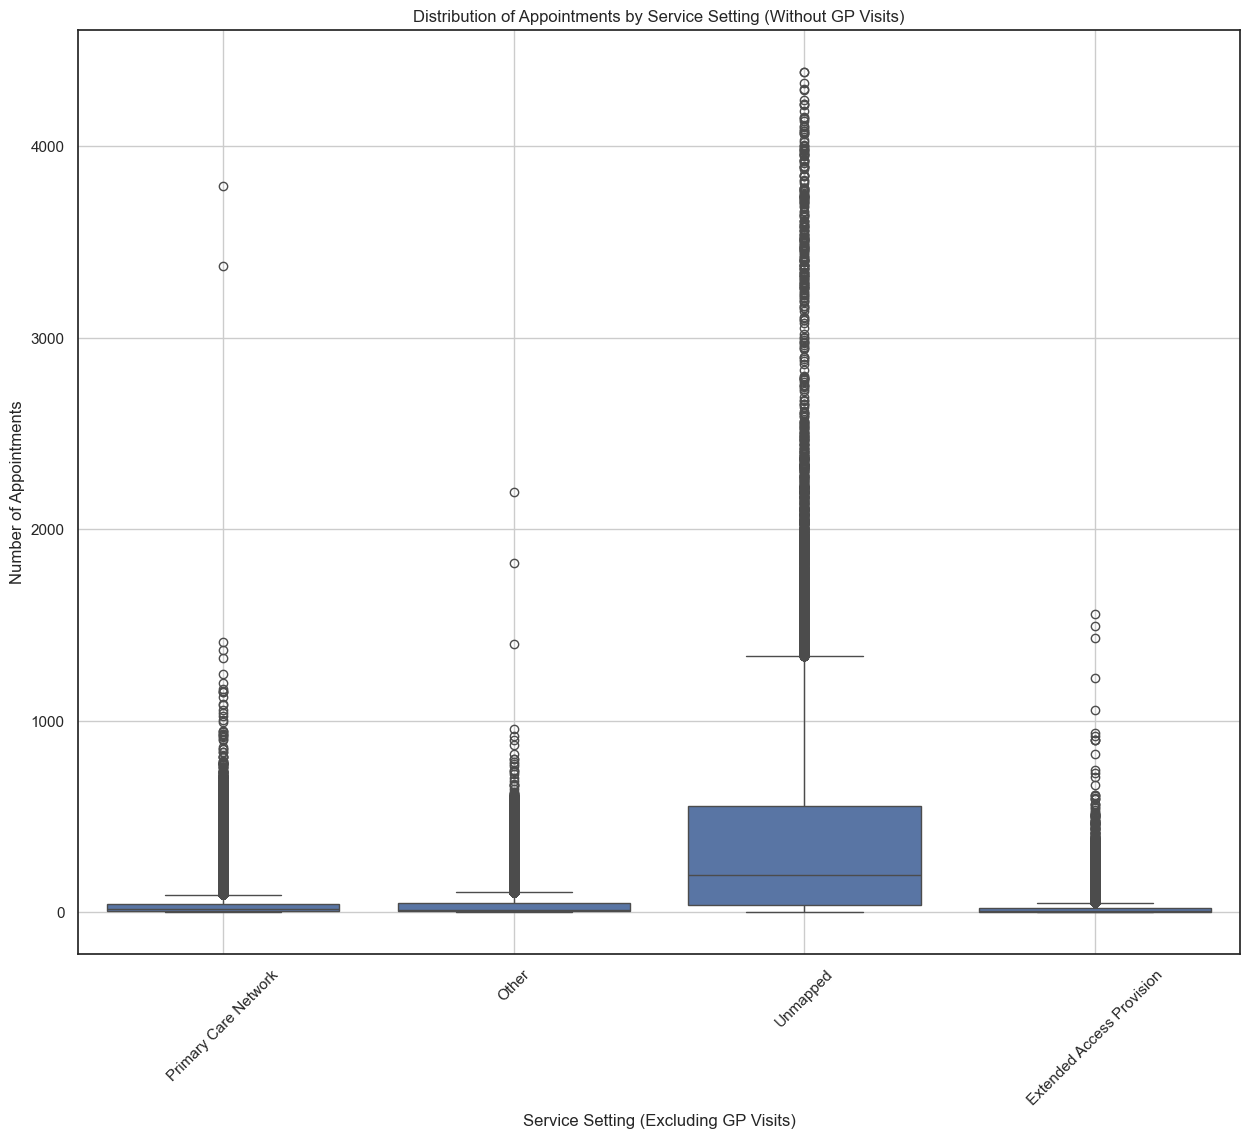

In [120]:
nc_filtered = nc[nc["service_setting"] != "General Practice"]

plt.figure

sns.boxplot(data=nc_filtered, x="service_setting", y="count_of_appointments")

plt.xticks(rotation=45)
plt.xlabel("Service Setting (Excluding GP Visits)")
plt.ylabel("Number of Appointments")
plt.title("Distribution of Appointments by Service Setting (Without GP Visits)")
plt.grid(True)

plt.show()

# 

> Double click to insert your summary.